<a href="https://colab.research.google.com/github/PreyPython123/Master-V24-Semiveiledet-Regresjon/blob/Variabelunders%C3%B8kelse/Bioco_Variabelunders%C3%B8kelse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importeringer

Importering av nødvendige bibliotek og pakker

In [ ]:
!pip install hoggorm
!pip install hoggormPlot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 627.6 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

import hoggorm as ho
import hoggormplot as hop
import time
import math

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from matplotlib.ticker import PercentFormatter

import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from statsmodels.graphics.tsaplots import plot_acf

Importering av data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Velger første kolonne med dato og tid som index
behandlet_data = pd.read_csv('/content/drive/MyDrive/MasterV24/Bioco_data/ekstremverdi_data_behandlet_bioco_data.csv',
                             header=0,
                             sep=',',
                             index_col=0)

# Importerer rådata
rå_data = pd.read_csv('/content/drive/MyDrive/MasterV24/BiocoData.csv',
                      header=0,
                      sep=';',
                      index_col=0)

# Formatterer index til riktig format og datatype
behandlet_data.index = pd.to_datetime(behandlet_data.index,
                                      format='%Y-%m-%d %H:%M:%S')

rå_data.index = pd.to_datetime(rå_data.index,
                               format='%d-%m-%Y %H:%M:%S.%f')

Mounted at /content/drive


## Egendefinerte moduler

In [ ]:
!pwd
! cp /content/drive/MyDrive/MasterV24/GitHub/moduler_trening_validering_testing_evaluering.py /content/moduler_trening_validering_testing_evaluering.py

/content


In [ ]:
from moduler_trening_validering_testing_evaluering import enzymfordeling
from moduler_trening_validering_testing_evaluering import trening_testsett_oppdeling_enzym
from moduler_trening_validering_testing_evaluering import trening_testsett_oppdeling_dag

Beskrivelse av behandlet datasett

In [ ]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28701 entries, 2022-10-31 17:37:00 to 2023-06-14 01:01:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   28701 non-null  int64  
 1   EnzymeType_A2   28701 non-null  int64  
 2   EnzymeType_B    28701 non-null  int64  
 3   EnzymeType_C    28701 non-null  int64  
 4   EnzymeType_D    28701 non-null  int64  
 5   EnzymeType_E    28701 non-null  int64  
 6   RawMatPercent   28701 non-null  float64
 7   NIRfat          28701 non-null  float64
 8   NIRash          28701 non-null  float64
 9   NIRwater        28701 non-null  float64
 10  TT08            28701 non-null  float64
 11  TT20            28701 non-null  float64
 12  TT12            28701 non-null  float64
 13  Collagen        81 non-null     float64
 14  Mw              445 non-null    float64
 15  SmallMolecules  445 non-null    float64
 16  BrixAdjusted    445 non-null    float64
d

In [ ]:
behandlet_data.describe()

,EnzymeType_A1,EnzymeType_A2,EnzymeType_B,EnzymeType_C,EnzymeType_D,EnzymeType_E,RawMatPercent,NIRfat,NIRash,NIRwater,TT08,TT20,TT12,Collagen,Mw,SmallMolecules,BrixAdjusted
count,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,28701.000000,81.000000,445.000000,445.000000,445.000000
mean,0.099125,0.620571,0.073586,0.066653,0.078534,0.061531,32.366658,15.095260,5.381940,62.720836,60.582587,59.661595,93.853492,23.250741,7294.963587,11.203884,0.104934
std,0.298836,0.485253,0.261101,0.249424,0.269015,0.240306,3.937233,1.882745,0.530011,0.707379,0.394755,0.552056,0.512142,5.188874,2416.863887,1.564800,0.019098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.620778,9.344147,2.821594,59.071452,58.561630,57.847495,88.549480,10.790000,3647.690683,8.025202,0.034219
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.322170,13.980203,5.077134,62.358376,60.341150,59.295000,93.937210,19.140000,5215.254390,10.255943,0.089627
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.999080,15.059910,5.404710,62.749640,60.639540,59.584010,93.987850,23.870000,6519.690093,10.977152,0.102411
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.070955,16.030756,5.679346,63.151284,60.872830,60.105220,94.046075,27.390000,9629.906827,11.962546,0.120232
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.427332,24.947005,7.356003,64.675535,61.849390,61.716180,94.549910,36.460000,12758.359174,16.873836,0.148454


## Funksjoner

## Funkjson for plotting av histogram

In [ ]:
def plot_histogram(df1, df2=None, labels=None, min_max_dict=None, figsize=(15, 20)):

  """

  """

  diskre_variabler = ['EnzymeCode', 'RawMaterialMix', 'Week', 'Day']
  farger = ["#20639B"] # seaborn standard blue

  fig = plt.figure(figsize=figsize)
  rute_nett = fig.add_gridspec(10, 3)

  n = 0
  i = 0

  for col in df1.columns:
      if i % 3 == 0:
          n += 1
          i = 0

      ax = fig.add_subplot(rute_nett[n, i])

      bins = 'auto'
      if df2 is not None:
        farger = ["#87CEEB", "#FF7F50"] # sky blue og coral
        if col not in diskre_variabler:
          bins = np.histogram_bin_edges(df1[col].dropna().tolist() + df2[col].dropna().tolist(), bins='auto')
        sns.histplot(x=col, data=df2, color=farger[1], ax=ax, stat='percent', label=labels[1], bins=bins, alpha=0.7)

      sns.histplot(x=col, data=df1, color=farger[0], ax=ax, stat='percent', label=labels[0], bins=bins, alpha=0.7)

      ax.set_xlabel(col)
      ax.set_ylabel('Andel', fontsize=10)
      ax.yaxis.set_major_formatter(PercentFormatter(100))
      ax.legend()

      if col not in diskre_variabler:
          ax.set_xticks([])
          if (min_max_dict is not None) and (col in min_max_dict):
            min_val, max_val = min_max_dict[col]
            ax.set_xlim(min_val, max_val)

      i += 1

  fig.tight_layout()
  plt.show()

## Funksjon for fordelinger

In [ ]:
def kategoriske_fordelinger(bioco_data, kategoriske_variabler):


  """

  """

  # Sjekker krav til kategorier
  for col in kategoriske_variabler:
    if col not in bioco_data.columns:
      raise ValueError(f"Mangler '{col}' i data.")

  fordelinger = {}

  # Berenger frekvens aog andeler
  for col in kategoriske_variabler:

    frekvens = bioco_data[col].value_counts()
    andel = bioco_data[col].value_counts(normalize=True) * 100

    fordelings_data = pd.DataFrame({
        'Frekvens': frekvens,
        'Andel (%)': andel
    })

    fordelinger[col] = fordelings_data

  # Printer resultater
  for col, data in fordelinger.items():
    print(f"\n**Fordelingen i '{col}':**")
    print(data.to_markdown(numalign='left', stralign='left'))

In [ ]:
def splitt_design_normal_prod(rå_data, data):
    """

    """

    # Finner informasjon om dag
    data_enzym = data.copy()

    enzym_data = rå_data.merge(data_enzym,
                             left_index=True,
                              right_index=True,
                              how='inner',
                              suffixes=('','_drop'))['EnzymeCode']

    data_enzym["EnzymeCode"] = enzym_data

    # Splitter data etter dagsinformasjon om produksjonstyper
    design_sett = data_enzym[data_enzym['EnzymeCode'] != "A2"].copy()
    normal_sett = data_enzym[data_enzym['EnzymeCode'] == "A2"].copy()

    # Ekskluderer variabel med dagsinfomasjon
    design_sett.drop(columns=['EnzymeCode'], inplace=True)
    normal_sett.drop(columns=['EnzymeCode'], inplace=True)

    return design_sett, normal_sett

In [ ]:
def splitt_markert_umarkert(data):
    """

    """

    # Splitter data etter dagsinformasjon om produksjonstyper
    markert_sett = data.dropna(subset=['Mw'])
    umarkert_sett = data[data['Mw'].isna()]

    return markert_sett, umarkert_sett

In [ ]:
def design_sett(rå_data, data):
    """

    """

    # Finner informasjon om dag
    data_enzym = data.copy()

    enzym_data = rå_data.merge(data_enzym,
                             left_index=True,
                              right_index=True,
                              how='inner',
                              suffixes=('','_drop'))['EnzymeCode']

    data_enzym["EnzymeCode"] = enzym_data

    # Splitter data etter dagsinformasjon om produksjonstyper
    design_sett = data_enzym[(data_enzym['EnzymeCode'] != "A2") & (data_enzym['EnzymeCode'] != "A1")].copy()

    # Ekskluderer variabel med dagsinfomasjon
    design_sett.drop(columns=['EnzymeCode'], inplace=True)

    return design_sett

# Funksjon for nedskalering av data

In [ ]:
def konverter_tid(sekunder):
  tid = time.gmtime(sekunder)
  dager, timer, minutter = tid[2], tid[3], tid[4]
  return dager, timer, minutter


def analyser_tidserier(bioco_rå_data, max_diff_seconds=60.0):
    # Lager lister for å lagre start- og slutttidspunkt på kontinuerlige tidserier
    tid_observasjon_start = []
    tid_observasjon_slutt = []

    # Legger til første observasjon i listen med startstider
    tid_observasjon_start.append(bioco_rå_data.index[0])

    # Går igjennom datasettet og lagrer slutt- og startstid på tidsintervaller
    # mer enn max_diff_seconds sekunder
    for i in range(1, len(bioco_rå_data.index)):
        tidsdiff = bioco_rå_data.index[i] - bioco_rå_data.index[i-1]
        if tidsdiff.total_seconds() > max_diff_seconds:
            tid_observasjon_slutt.append(bioco_rå_data.index[i-1])
            tid_observasjon_start.append(bioco_rå_data.index[i])

    # Legger til siste observasjonstid i datasettet
    tid_observasjon_slutt.append(bioco_rå_data.index[-1])

    print("Det er {} kontinuerlige observasjoner med intervall på {} min:".format(len(tid_observasjon_slutt), max_diff_seconds/60))

    lengst_kontinuitet = 0
    kortest_kontinuitet = math.inf
    lengst_passiv = 0
    kortest_passiv = math.inf

    forrige_stopp = False
    forrige_korteste_passiv = False

    # Får oversikt over kontinuerlige datasett
    for start, slutt in zip(tid_observasjon_start, tid_observasjon_slutt):
        uke = start.isocalendar().week

        print("Uke {}: Tidsintervallet {} til {}"
              " er kontinuerlig tidserie".format(uke, start, slutt))

        # Beregner kontiuitet i tidseriedata
        kontinuitet = (slutt - start).total_seconds()

        if kontinuitet < kortest_kontinuitet:
            kortest_kontinuitet = kontinuitet
        if kontinuitet >= lengst_kontinuitet:
            lengst_kontinuitet = kontinuitet

        # Beregner tid mellom sist tidspunkt for datasinnsamling og nest tidspunkt
        # for datainnsamling
        if forrige_stopp:
            passiv = (start - forrige_stopp).total_seconds()
            # Ser bort i fra mangel på datainnsamling i helger og stopp mellom uke 50
            # til uke 26
            if konverter_tid(passiv)[0] - 1 < 2:
                if passiv < kortest_passiv:
                    forrige_korteste_passiv = kortest_passiv
                    kortest_passiv = passiv
                if passiv >= lengst_passiv:
                    lengst_passiv = passiv

        forrige_stopp = slutt

    print("Lengst kontinuitet: {} dager, {} timer og {} minutter".format(konverter_tid(lengst_kontinuitet)[0]-1,
                                                                         konverter_tid(lengst_kontinuitet)[1],
                                                                         konverter_tid(lengst_kontinuitet)[2]))
    print("Kortest kontinuitet: {} dager, {} timer og {} minutter".format(konverter_tid(kortest_kontinuitet)[0]-1,
                                                                          konverter_tid(kortest_kontinuitet)[1],
                                                                          konverter_tid(kortest_kontinuitet)[2]))
    print("Lengst passivitet: {} dager, {} timer og {} minutter".format(konverter_tid(lengst_passiv)[0]-1,
                                                                        konverter_tid(lengst_passiv)[1],
                                                                        konverter_tid(lengst_passiv)[2]))
    print("Forrige kortest passivitet: {} dager, {} timer og {} minutter".format(konverter_tid(forrige_korteste_passiv)[0]-1,
                                                                         konverter_tid(forrige_korteste_passiv)[1],
                                                                         konverter_tid(forrige_korteste_passiv)[2]))

In [ ]:
def konverter_tidserier(bioco_rå_data, max_diff_seconds=60.0, faktor=5, valg='første', liste_markerte=None):
    # Lager lister for å lagre start- og slutttidspunkt på kontinuerlige tidserier
    tid_observasjon_start = []
    tid_observasjon_slutt = []

    # Legger til første observasjon i listen med startstider
    tid_observasjon_start.append(bioco_rå_data.index[0])

    # Går igjennom datasettet og lagrer slutt- og startstid på tidsintervaller
    # mer enn max_diff_seconds sekunder
    for i in range(1, len(bioco_rå_data.index)):
        tidsdiff = bioco_rå_data.index[i] - bioco_rå_data.index[i-1]
        if tidsdiff.total_seconds() > max_diff_seconds:
            tid_observasjon_slutt.append(bioco_rå_data.index[i-1])
            tid_observasjon_start.append(bioco_rå_data.index[i])

    # Legger til siste observasjonstid i datasettet
    tid_observasjon_slutt.append(bioco_rå_data.index[-1])

    print("Det er {} kontinuerlige observasjoner med intervall på {} min:".format(len(tid_observasjon_slutt), max_diff_seconds/60))

    # Ny DataFrame for transformerte data
    transformerte_data = pd.DataFrame()

    # Får oversikt over kontinuerlige datasett
    for start, slutt in zip(tid_observasjon_start, tid_observasjon_slutt):
        uke = start.isocalendar().week

        print("Uke {}: Tidsintervallet {} til {} er kontinuerlig tidserie".format(uke, start, slutt))

        # Gå gjennom tidsserien i 5-minutters intervaller
        sub_data = bioco_rå_data[start:slutt]
        sub_data_resampled = []

        for i in range(0, len(sub_data), faktor):
            chunk = sub_data[i:i+faktor]

            if valg == 'første':
                resampled_point = chunk.iloc[0]
            elif valg == 'siste':
                resampled_point = chunk.iloc[-1]
            elif valg == 'markert':
              maske = chunk[liste_markerte].notna().any(axis=1)
              if maske.any():
                    resampled_point = chunk[maske].iloc[0]
              else:
                    resampled_point = chunk.iloc[-1]

            sub_data_resampled.append(resampled_point)

        transformerte_data = pd.concat([transformerte_data, pd.DataFrame(sub_data_resampled)])

    return transformerte_data

# Nedskalering av data

In [ ]:
analyser_tidserier(behandlet_data, max_diff_seconds=5*60.0)

Det er 50 kontinuerlige observasjoner med intervall på 5.0 min:
Uke 44: Tidsintervallet 2022-10-31 17:37:00 til 2022-11-01 17:27:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-01 17:58:00 til 2022-11-02 05:18:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-02 10:47:00 til 2022-11-03 01:58:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 02:34:00 til 2022-11-03 09:14:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 09:33:00 til 2022-11-03 18:51:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 19:14:00 til 2022-11-04 10:50:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 12:01:00 til 2022-11-04 12:50:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 12:57:00 til 2022-11-04 13:27:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 14:06:00 til 2022-11-04 14:23:00 er kontinuerlig tidserie
Uke 45: Tidsintervallet 2022-11-07 16:40:00 til 2022-11-08 22:14:00 er kontinuerlig tidserie
Uke 45

In [ ]:
data_nedskalert = konverter_tidserier(behandlet_data,
                                      max_diff_seconds=60.0,
                                      faktor=5,
                                      valg='markert',
                                      liste_markerte=["Collagen", "Mw", "SmallMolecules", "BrixAdjusted"])

Det er 74 kontinuerlige observasjoner med intervall på 1.0 min:
Uke 44: Tidsintervallet 2022-10-31 17:37:00 til 2022-11-01 17:27:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-01 17:58:00 til 2022-11-02 05:18:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-02 10:47:00 til 2022-11-03 01:58:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 02:34:00 til 2022-11-03 09:14:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 09:33:00 til 2022-11-03 18:51:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 19:14:00 til 2022-11-04 08:32:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 08:35:00 til 2022-11-04 10:50:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 12:01:00 til 2022-11-04 12:01:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 12:05:00 til 2022-11-04 12:05:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 12:08:00 til 2022-11-04 12:50:00 er kontinuerlig tidserie
Uke 44

In [ ]:
analyser_tidserier(data_nedskalert, max_diff_seconds=15*60.0)

Det er 45 kontinuerlige observasjoner med intervall på 15.0 min:
Uke 44: Tidsintervallet 2022-10-31 17:41:00 til 2022-11-01 17:27:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-01 18:02:00 til 2022-11-02 05:18:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-02 10:51:00 til 2022-11-03 01:58:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 02:38:00 til 2022-11-03 09:14:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 09:37:00 til 2022-11-03 18:51:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-03 19:18:00 til 2022-11-04 10:50:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 12:01:00 til 2022-11-04 13:27:00 er kontinuerlig tidserie
Uke 44: Tidsintervallet 2022-11-04 14:06:00 til 2022-11-04 14:23:00 er kontinuerlig tidserie
Uke 45: Tidsintervallet 2022-11-07 16:44:00 til 2022-11-08 22:14:00 er kontinuerlig tidserie
Uke 45: Tidsintervallet 2022-11-09 02:30:00 til 2022-11-09 04:44:00 er kontinuerlig tidserie
Uke 4

In [ ]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28701 entries, 2022-10-31 17:37:00 to 2023-06-14 01:01:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   28701 non-null  int64  
 1   EnzymeType_A2   28701 non-null  int64  
 2   EnzymeType_B    28701 non-null  int64  
 3   EnzymeType_C    28701 non-null  int64  
 4   EnzymeType_D    28701 non-null  int64  
 5   EnzymeType_E    28701 non-null  int64  
 6   RawMatPercent   28701 non-null  float64
 7   NIRfat          28701 non-null  float64
 8   NIRash          28701 non-null  float64
 9   NIRwater        28701 non-null  float64
 10  TT08            28701 non-null  float64
 11  TT20            28701 non-null  float64
 12  TT12            28701 non-null  float64
 13  Collagen        81 non-null     float64
 14  Mw              445 non-null    float64
 15  SmallMolecules  445 non-null    float64
 16  BrixAdjusted    445 non-null    float64
d

In [ ]:
data_nedskalert.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5773 entries, 2022-10-31 17:41:00 to 2023-06-14 01:01:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   5773 non-null   float64
 1   EnzymeType_A2   5773 non-null   float64
 2   EnzymeType_B    5773 non-null   float64
 3   EnzymeType_C    5773 non-null   float64
 4   EnzymeType_D    5773 non-null   float64
 5   EnzymeType_E    5773 non-null   float64
 6   RawMatPercent   5773 non-null   float64
 7   NIRfat          5773 non-null   float64
 8   NIRash          5773 non-null   float64
 9   NIRwater        5773 non-null   float64
 10  TT08            5773 non-null   float64
 11  TT20            5773 non-null   float64
 12  TT12            5773 non-null   float64
 13  Collagen        81 non-null     float64
 14  Mw              443 non-null    float64
 15  SmallMolecules  443 non-null    float64
 16  BrixAdjusted    443 non-null    float64
dt

# PCA

Legger tilbake kategoriske variabler for undersøkelse

In [ ]:
# Lager kopi av behandlet data
forklaring_data = copy.deepcopy(behandlet_data)

# Dropper responsvariabler
forklaring_data.drop(forklaring_data.columns[-4:], axis=1, inplace=True)

PCA analyse - Hoggorm

In [ ]:
# Navn på forklaringsvariabler
variabel_navn = list(forklaring_data.columns)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))])

forklaring_imputed = pipeline.fit_transform(forklaring_data)

# pca modell
pca_modell = ho.nipalsPCA(arrX=forklaring_imputed,
                          Xstand=True,
                          numComp=5)

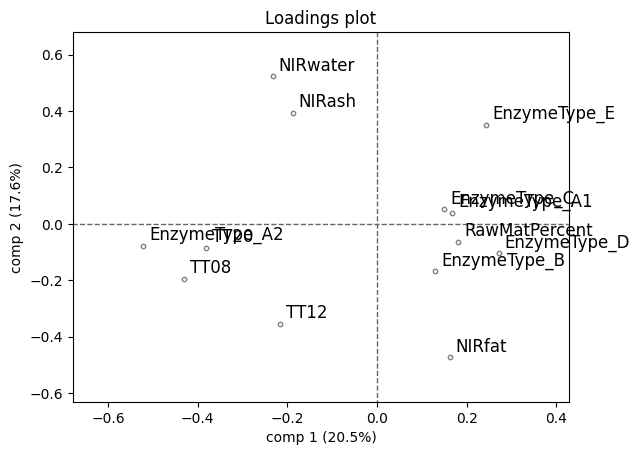

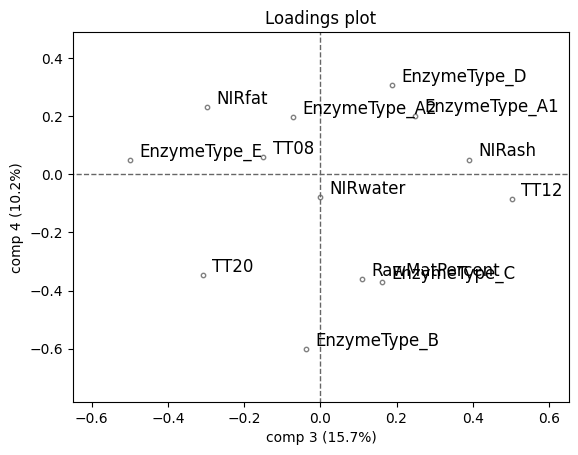

In [ ]:
# pca plot kompoenent 1 and 2
hop.plot(pca_modell, comp = [1,2],
         plots = [2],
         XvarNames=variabel_navn)

# pca plt komponent 3 and 4
hop.plot(pca_modell, comp = [3,4],
         plots = [2],
         XvarNames=variabel_navn)

# Dataforståelse av behandlet datasett: Hele datasett

Informasjon om antall observasjoner for hver kolonne

In [ ]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28701 entries, 2022-10-31 17:37:00 to 2023-06-14 01:01:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   28701 non-null  int64  
 1   EnzymeType_A2   28701 non-null  int64  
 2   EnzymeType_B    28701 non-null  int64  
 3   EnzymeType_C    28701 non-null  int64  
 4   EnzymeType_D    28701 non-null  int64  
 5   EnzymeType_E    28701 non-null  int64  
 6   RawMatPercent   28701 non-null  float64
 7   NIRfat          28701 non-null  float64
 8   NIRash          28701 non-null  float64
 9   NIRwater        28701 non-null  float64
 10  TT08            28701 non-null  float64
 11  TT20            28701 non-null  float64
 12  TT12            28701 non-null  float64
 13  Collagen        81 non-null     float64
 14  Mw              445 non-null    float64
 15  SmallMolecules  445 non-null    float64
 16  BrixAdjusted    445 non-null    float64
d

In [ ]:
# Definerer bestemte aksegrener for x_akse for sammenlignbarhet uten synlige verdier
# Bruker maks og min verdier
min_max_dict_hel = {}
for col in behandlet_data.columns:
  min_max_dict_hel[col] = [behandlet_data[col].min(), behandlet_data[col].max()]

## Fordeling i variabler i behandlet datasett

Lager kopi for merinformasjon om tid og enzymtype

In [ ]:
# Legger til uke og dagsinformasjon
behandlet_data_tid = copy.deepcopy(behandlet_data)
behandlet_data_tid['Week'] = behandlet_data.index.isocalendar().week
behandlet_data_tid['Day'] = (behandlet_data_tid.index.isocalendar().day)

# Enzymtyper
enzym_data = rå_data.merge(behandlet_data_tid,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

# Legger til enzymtypeinformasjon og ekskluderer "labelancodet"-kolonner for
# enzymer
behandlet_data_tid = pd.concat([behandlet_data_tid, enzym_data], axis=1)
behandlet_data_tid = behandlet_data_tid.iloc[:, 6:]

In [ ]:
# Legger til uke og dagsinformasjon
data_nedskalert_tid = copy.deepcopy(data_nedskalert)
data_nedskalert_tid['Week'] = data_nedskalert.index.isocalendar().week
data_nedskalert_tid['Day'] = (data_nedskalert_tid.index.isocalendar().day)

# Enzymtyper
enzym_data = rå_data.merge(data_nedskalert_tid,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

# Legger til enzymtypeinformasjon og ekskluderer "labelancodet"-kolonner for
# enzymer
data_nedskalert_tid = pd.concat([data_nedskalert_tid, enzym_data], axis=1)
data_nedskalert_tid = data_nedskalert_tid.iloc[:, 6:]

## Fordeling i variablene for hele datasettet med uke- og dagsinformasjon

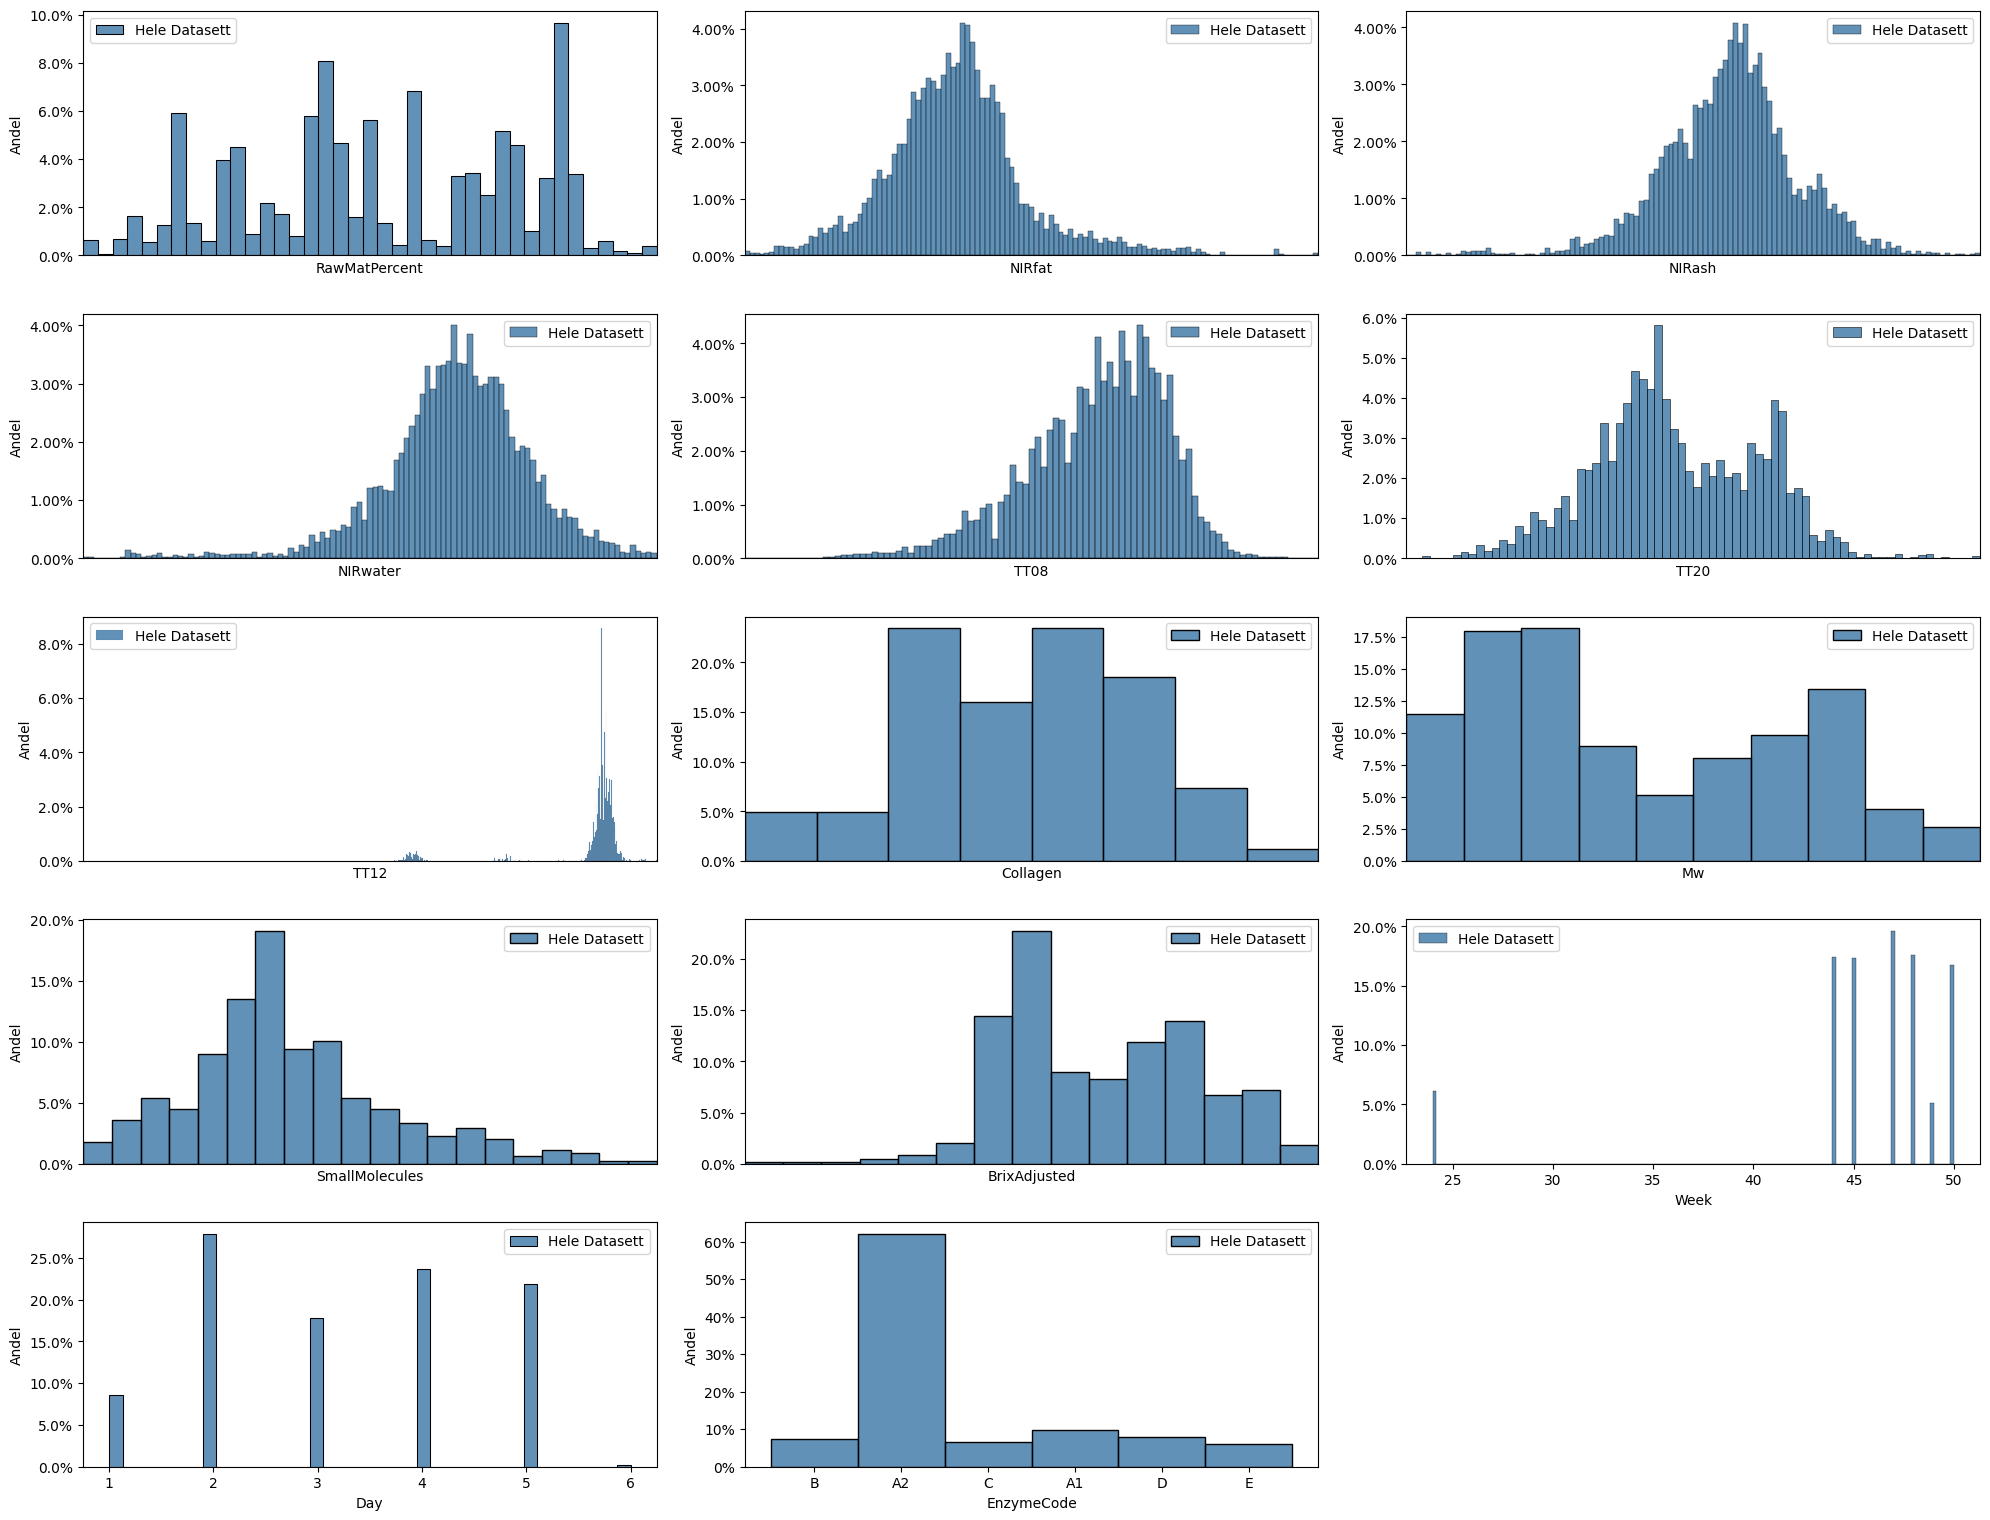

In [ ]:
plot_histogram(df1=behandlet_data_tid, df2=None, labels=['Hele Datasett'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

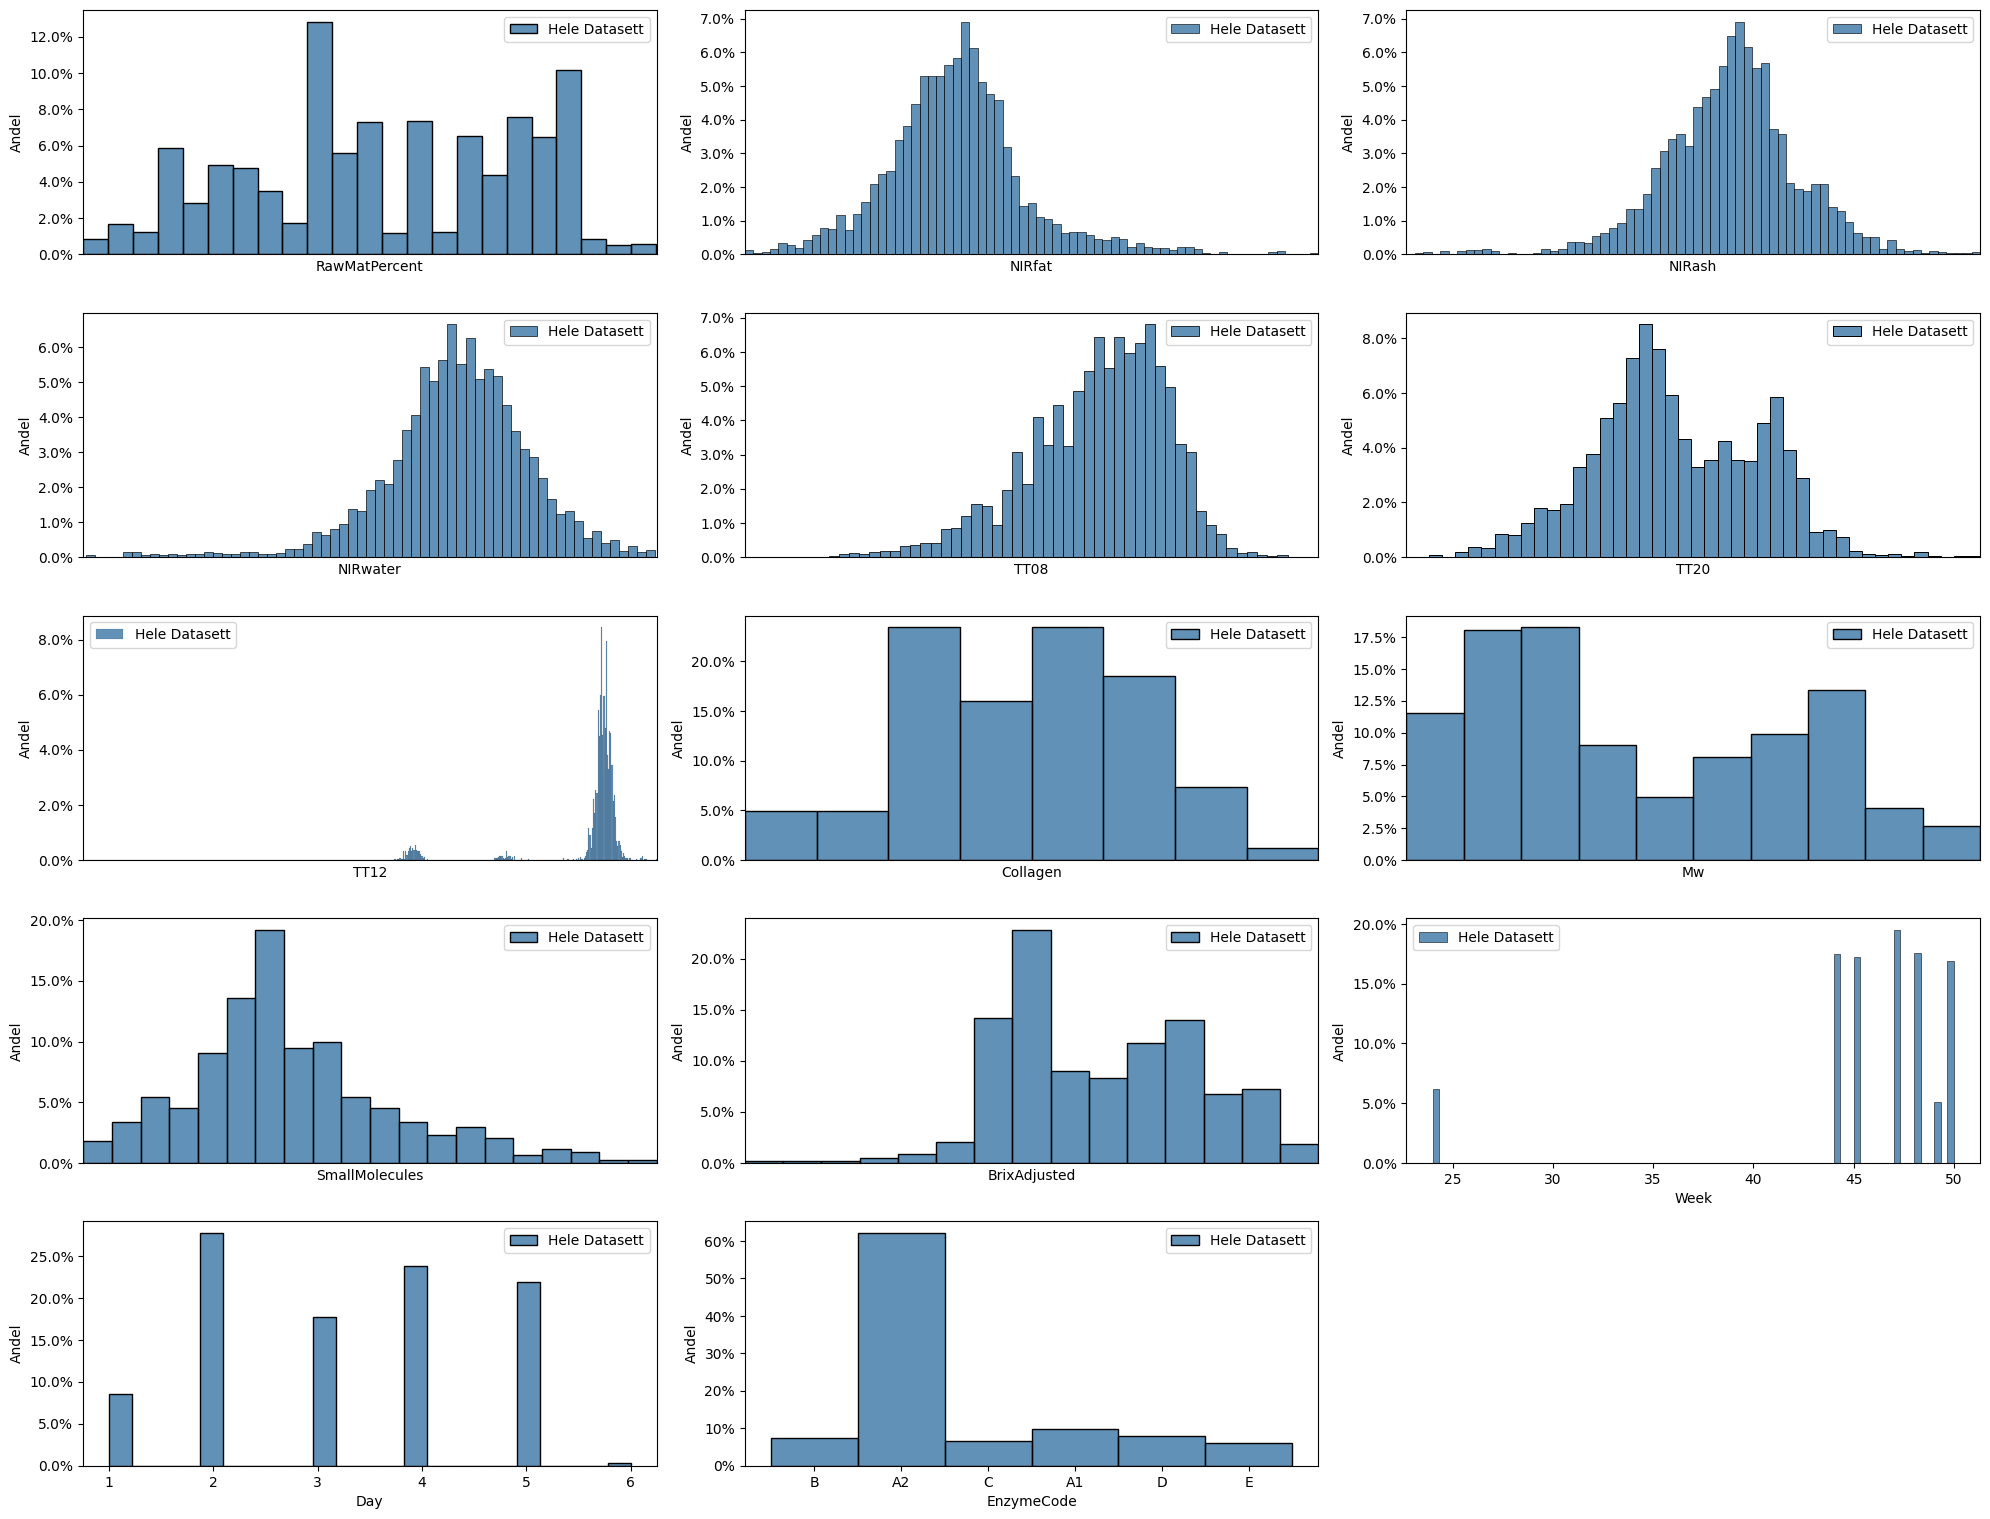

In [ ]:
plot_histogram(df1=data_nedskalert_tid, df2=None, labels=['Hele Datasett'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i hele datasett

In [ ]:
kategoriske_fordelinger(behandlet_data_tid, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 17811      | 62.0571     |
| A1           | 2845       | 9.91255     |
| D            | 2254       | 7.85338     |
| B            | 2112       | 7.35863     |
| C            | 1913       | 6.66527     |
| E            | 1766       | 6.1531      |


In [ ]:
kategoriske_fordelinger(data_nedskalert_tid, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 3590       | 62.186      |
| A1           | 570        | 9.87355     |
| D            | 451        | 7.81223     |
| B            | 424        | 7.34453     |
| C            | 383        | 6.63433     |
| E            | 355        | 6.14932     |


## Fordeling i markert del av datasettet

In [ ]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_tid.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_tid.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_tid[behandlet_data_tid['Collagen'].isna()]

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_tid[behandlet_data_tid['Mw'].isna()]

Fordeling i datasett med Collagen som markert respons

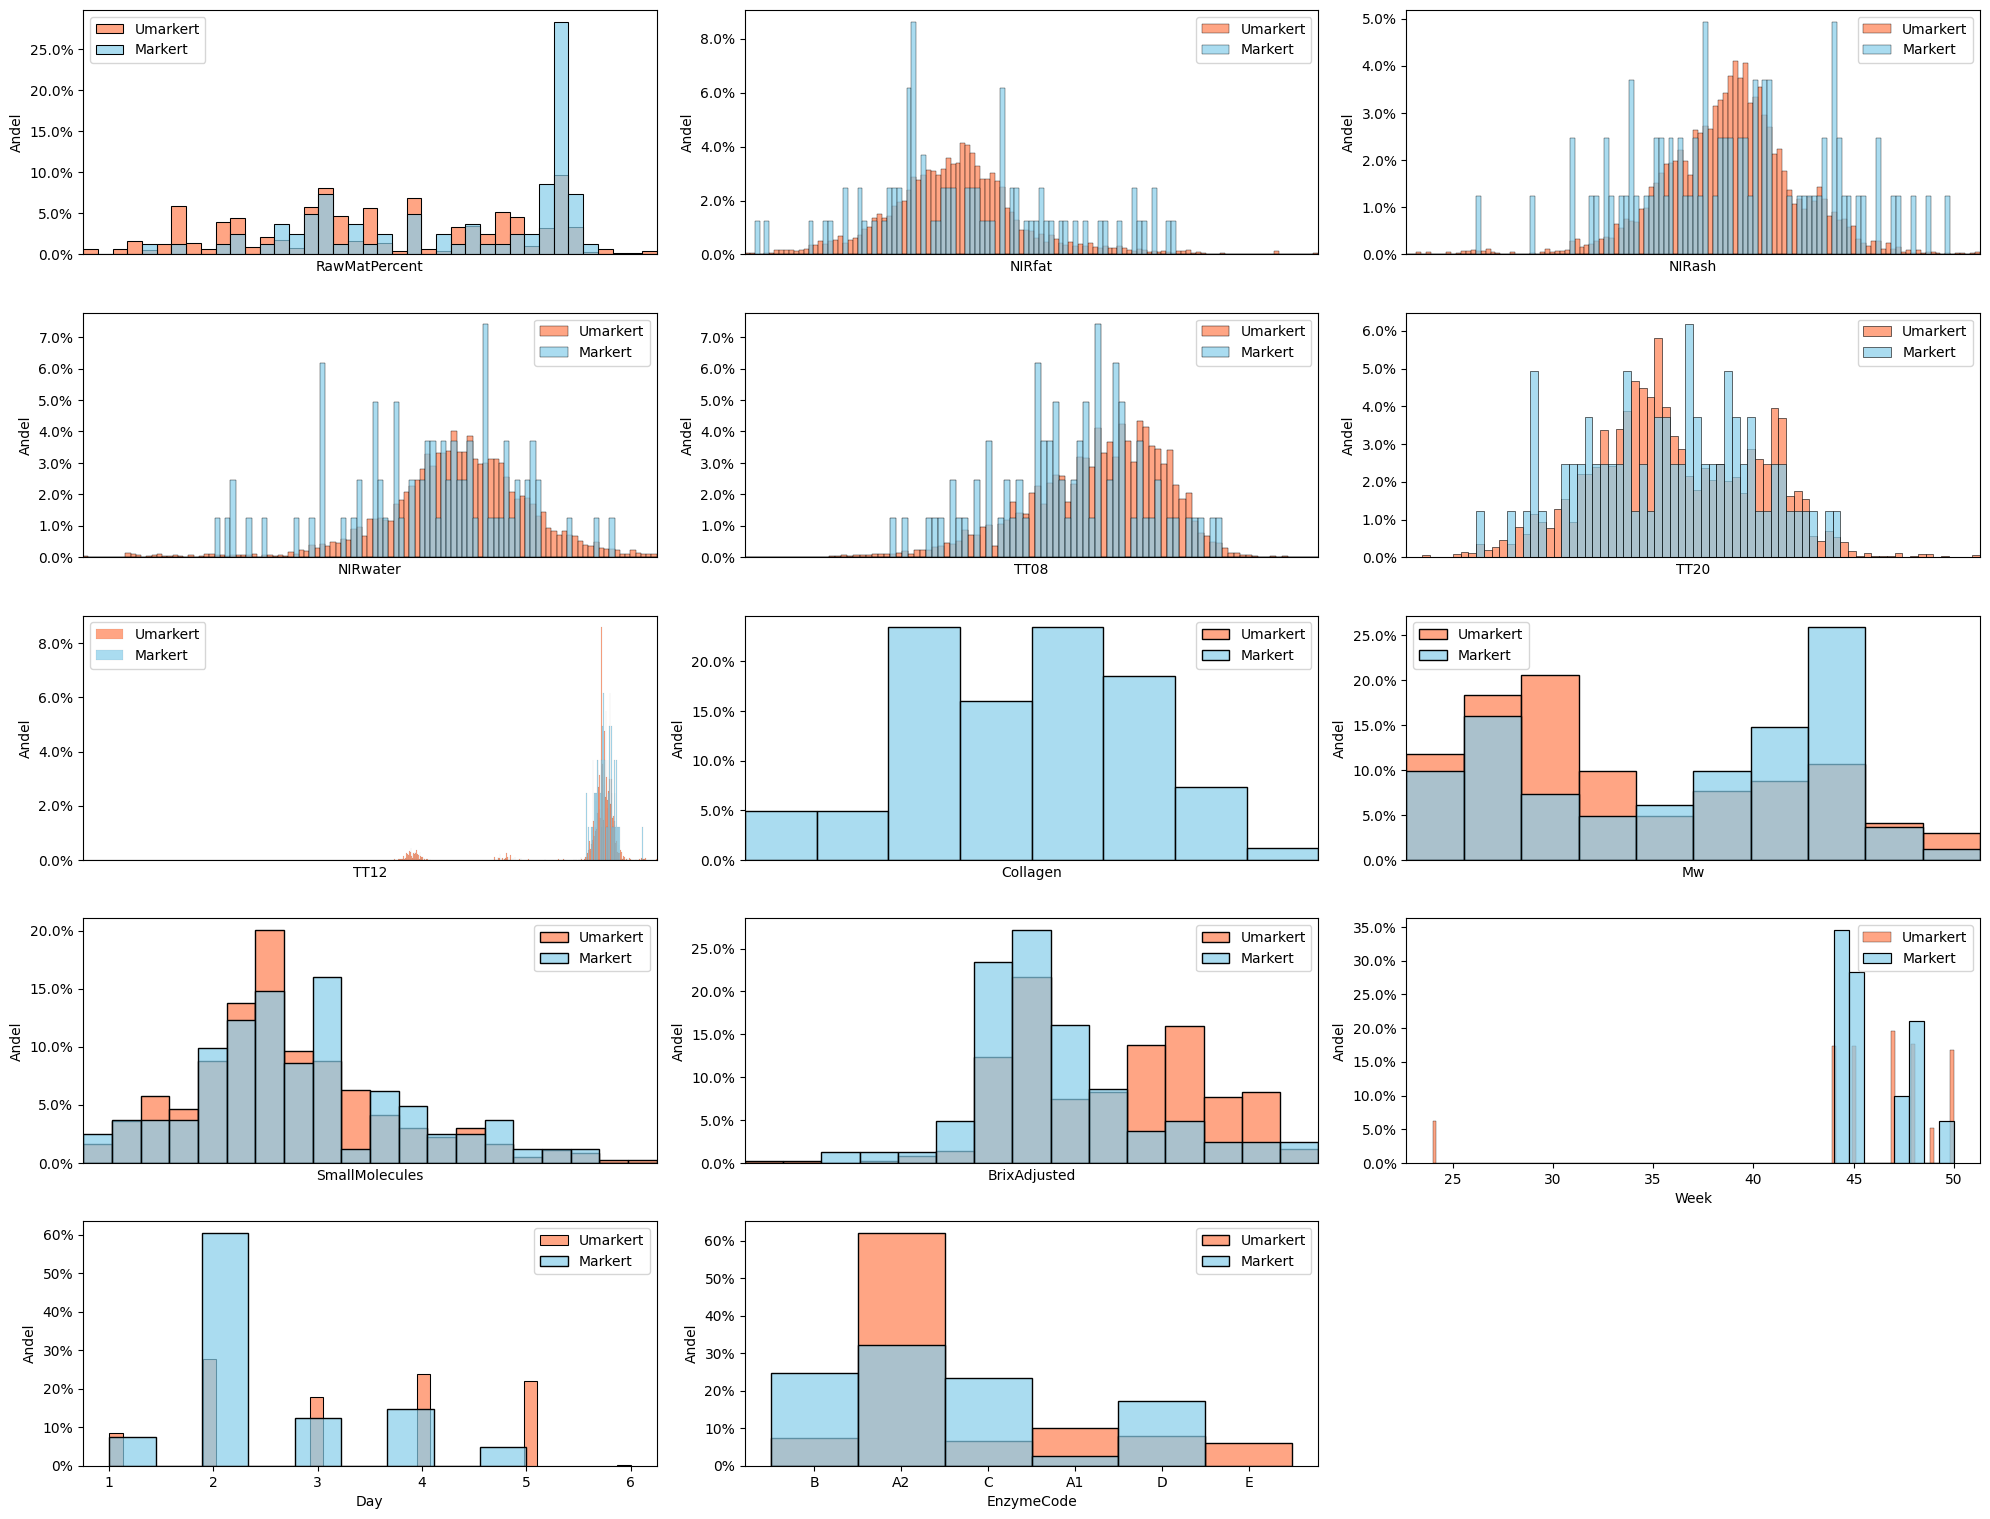

In [ ]:
plot_histogram(df1=collagen_markert, df2=collagen_umarkert, labels=['Markert', 'Umarkert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i datasett med Collagen som respons

In [ ]:
kategoriske_fordelinger(collagen_markert, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 26         | 32.0988     |
| B            | 20         | 24.6914     |
| C            | 19         | 23.4568     |
| D            | 14         | 17.284      |
| A1           | 2          | 2.46914     |


In [ ]:
kategoriske_fordelinger(collagen_umarkert, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 17785      | 62.1419     |
| A1           | 2843       | 9.93361     |
| D            | 2240       | 7.82669     |
| B            | 2092       | 7.30957     |
| C            | 1894       | 6.61775     |
| E            | 1766       | 6.17051     |


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

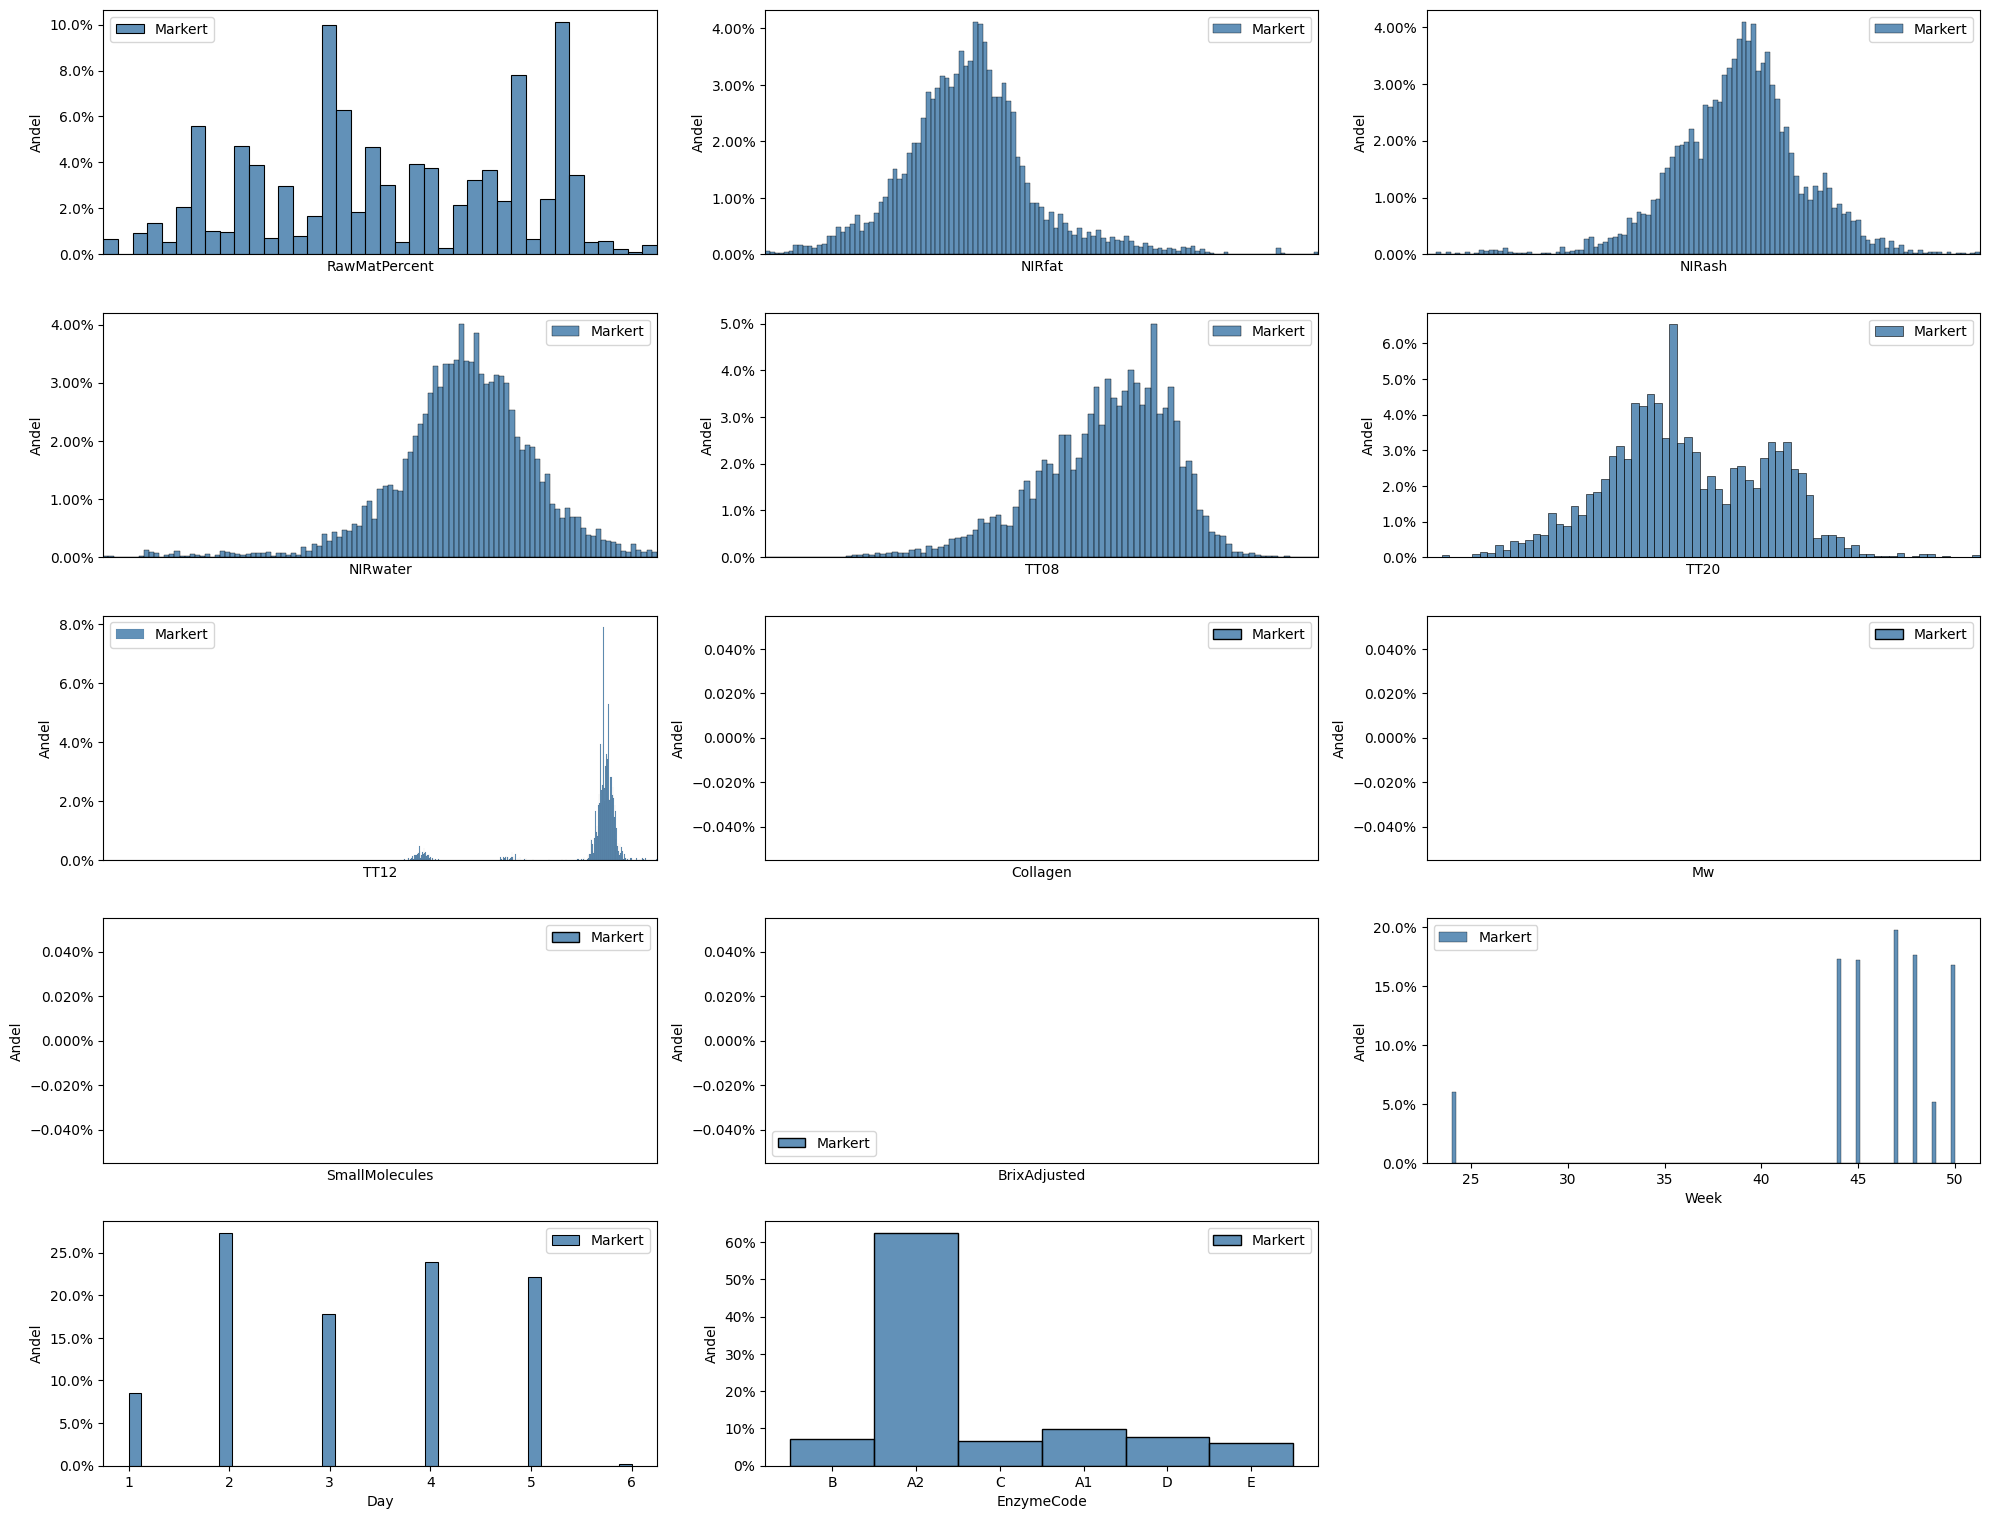

In [ ]:
plot_histogram(df1=kvalitetsmålinger_umarkert, df2=None, labels=['Markert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

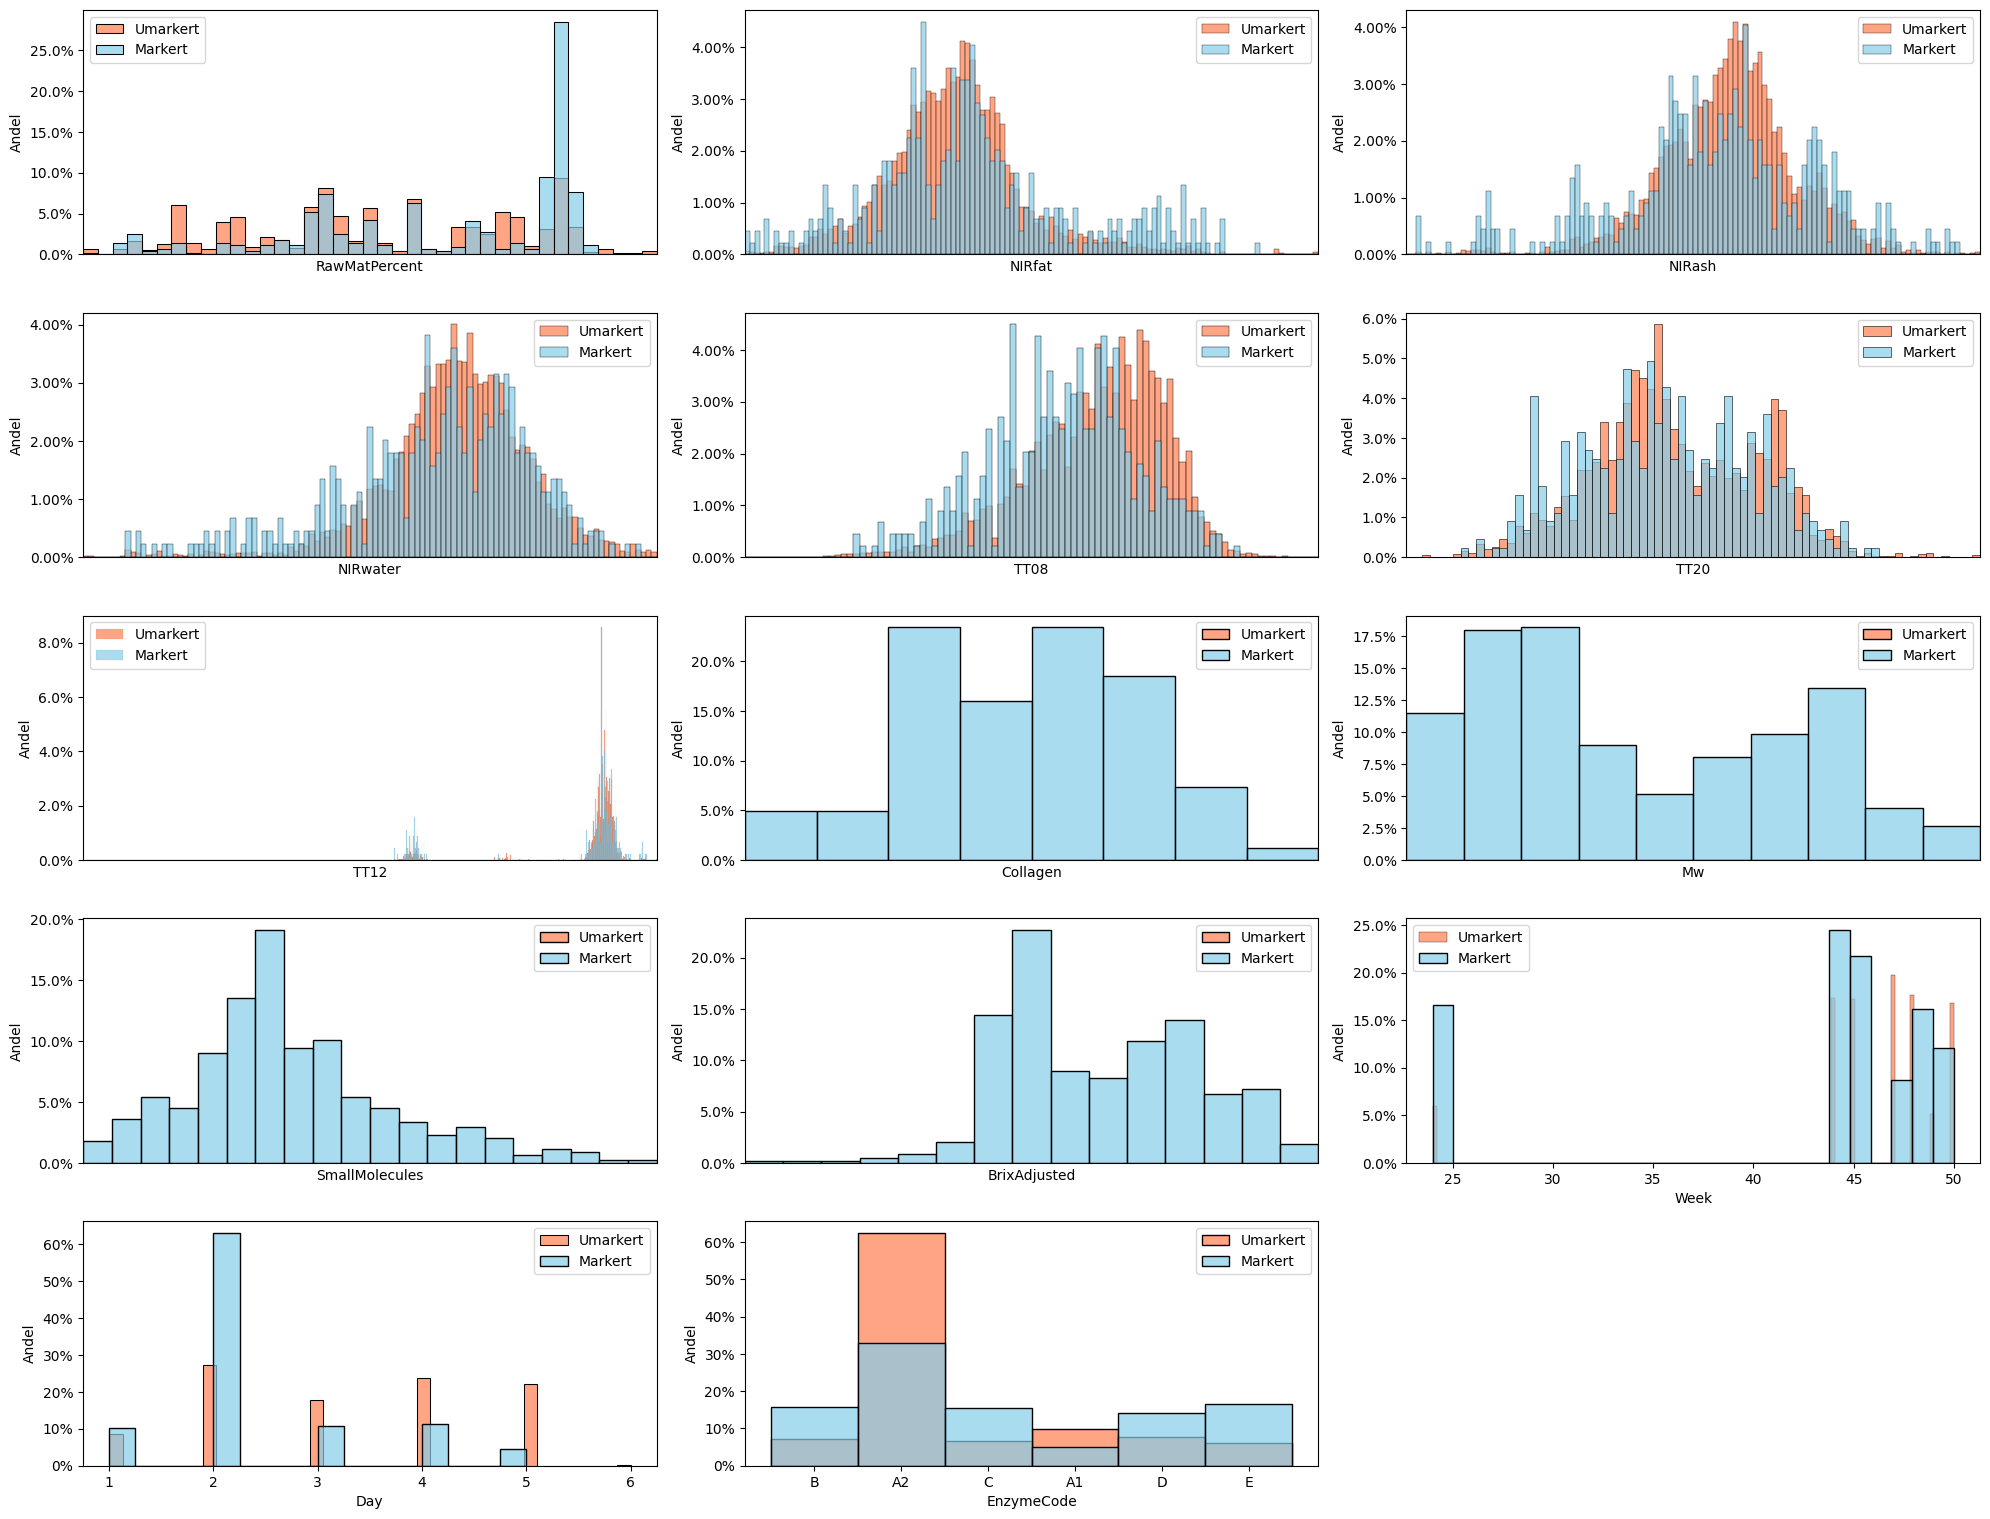

In [ ]:
plot_histogram(df1=kvalitetsmålinger_markert, df2=kvalitetsmålinger_umarkert, labels=['Markert', 'Umarkert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som respons

In [ ]:
kategoriske_fordelinger(kvalitetsmålinger_markert, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 147        | 33.0337     |
| E            | 74         | 16.6292     |
| B            | 70         | 15.7303     |
| C            | 69         | 15.5056     |
| D            | 63         | 14.1573     |
| A1           | 22         | 4.94382     |


Fordeling i umarkert del av datasettet

In [ ]:
kategoriske_fordelinger(kvalitetsmålinger_umarkert, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 17664      | 62.5142     |
| A1           | 2823       | 9.9908      |
| D            | 2191       | 7.75411     |
| B            | 2042       | 7.22678     |
| C            | 1844       | 6.52605     |
| E            | 1692       | 5.98811     |


## Fordeling i markert del av datasettet

In [ ]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = data_nedskalert_tid.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = data_nedskalert_tid.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = data_nedskalert_tid[data_nedskalert_tid['Collagen'].isna()]

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = data_nedskalert_tid[data_nedskalert_tid['Mw'].isna()]

Fordeling i datasett med Collagen som markert respons

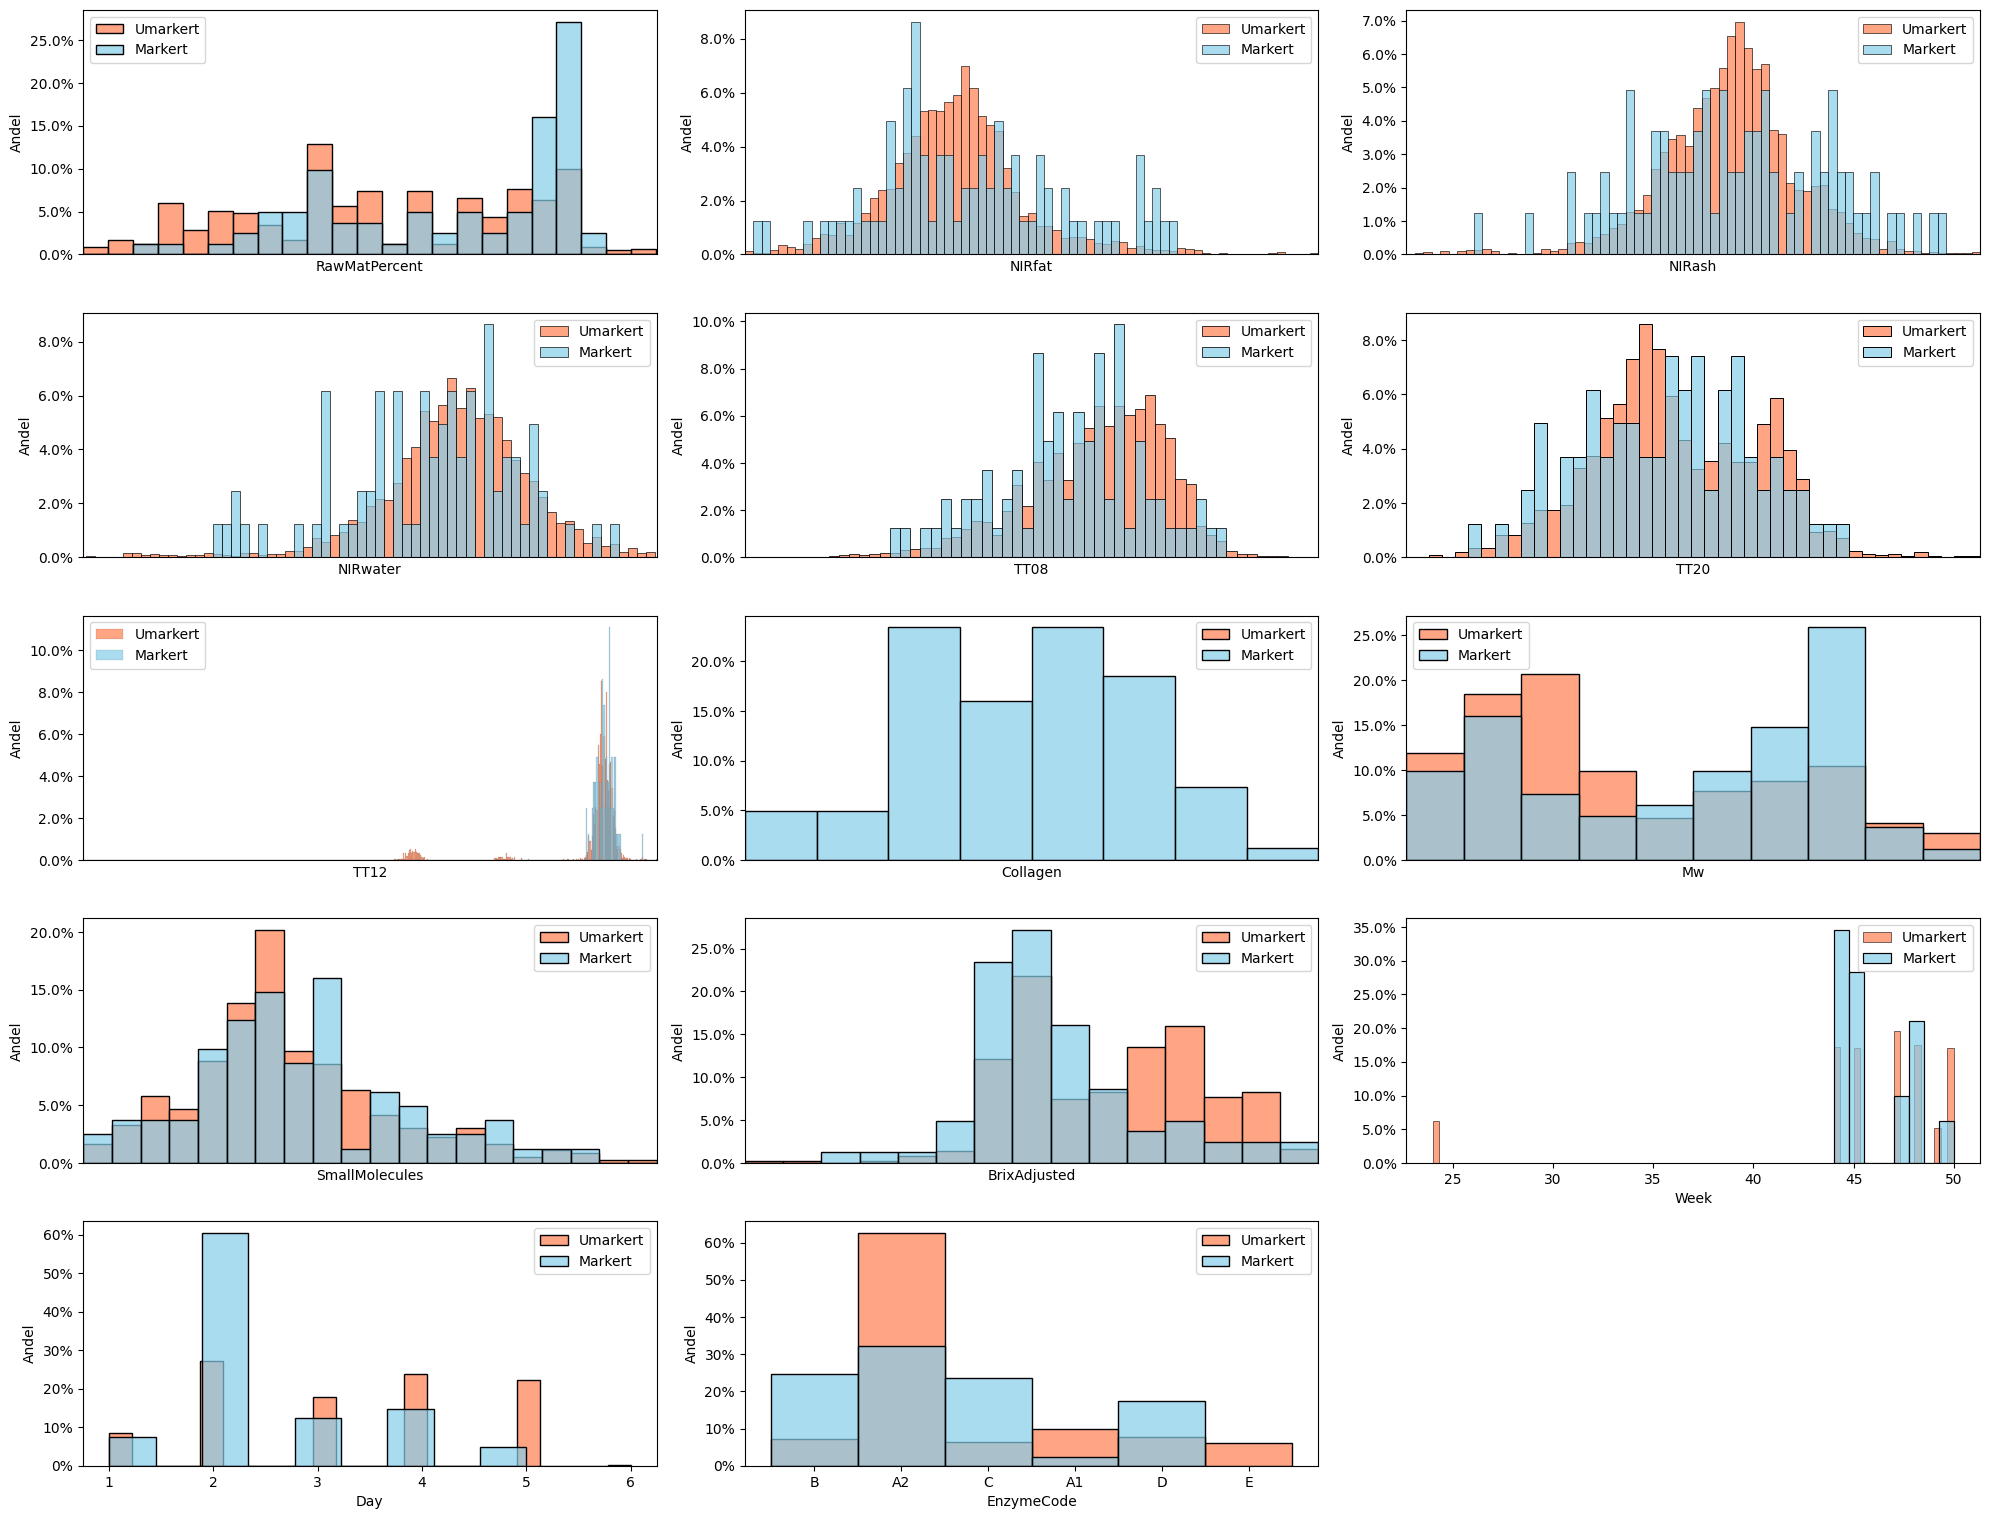

In [ ]:
plot_histogram(df1=collagen_markert, df2=collagen_umarkert, labels=['Markert', 'Umarkert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i datasett med Collagen som respons

In [ ]:
kategoriske_fordelinger(collagen_markert, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 26         | 32.0988     |
| B            | 20         | 24.6914     |
| C            | 19         | 23.4568     |
| D            | 14         | 17.284      |
| A1           | 2          | 2.46914     |


In [ ]:
kategoriske_fordelinger(collagen_umarkert, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 3564       | 62.6142     |
| A1           | 568        | 9.97892     |
| D            | 437        | 7.67744     |
| B            | 404        | 7.09768     |
| C            | 364        | 6.39494     |
| E            | 355        | 6.23682     |


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

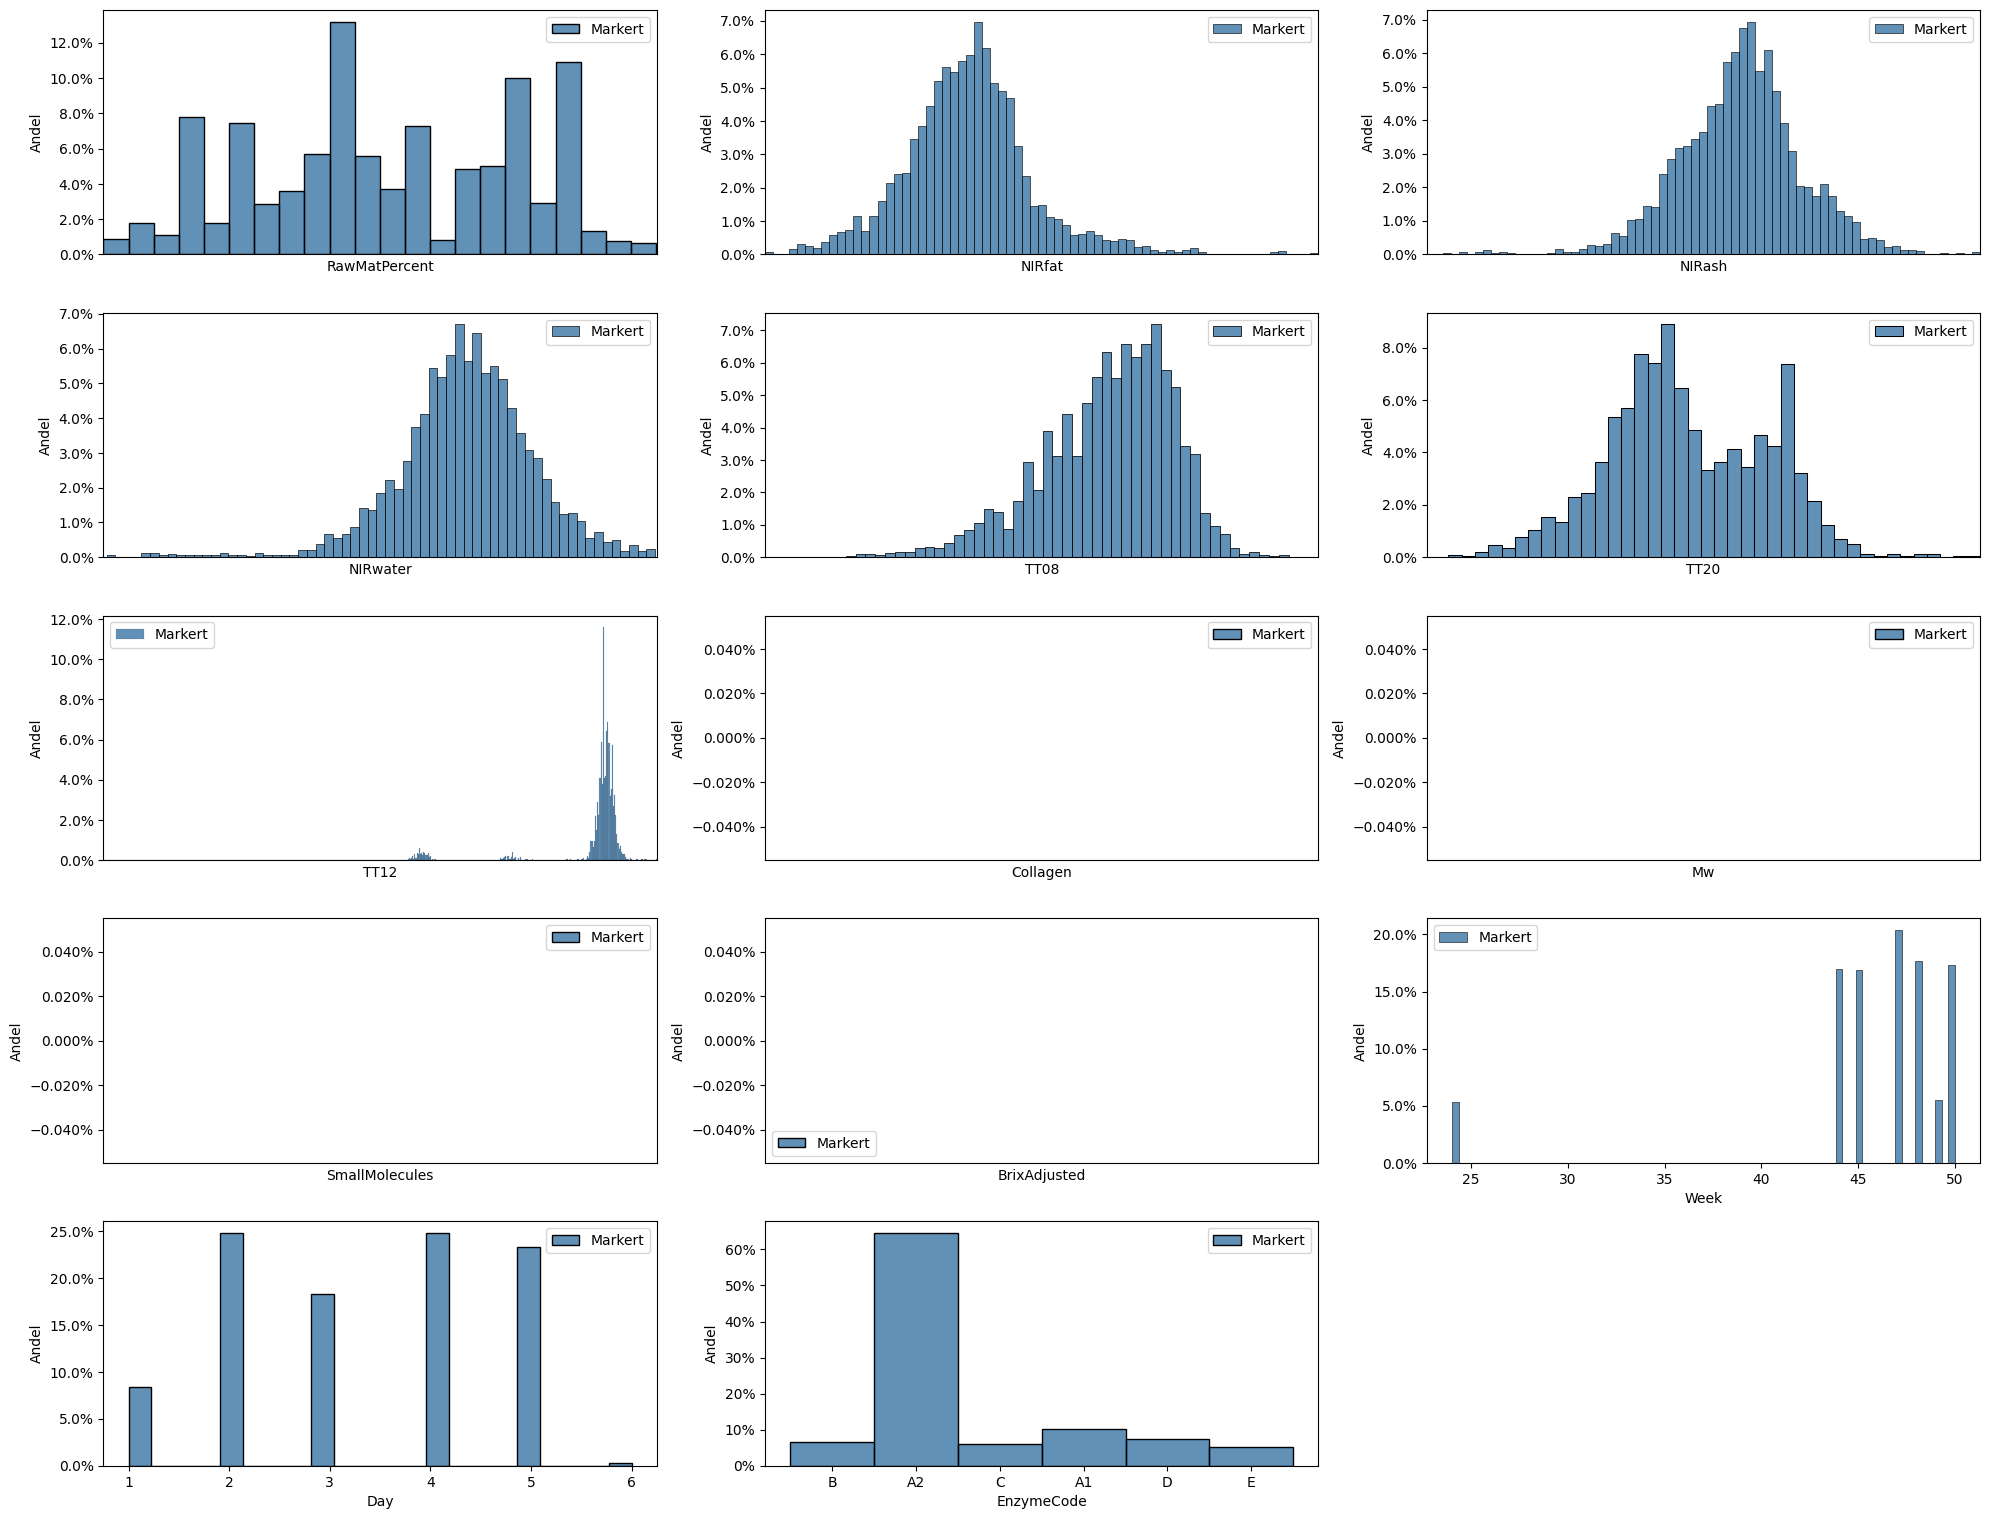

In [ ]:
plot_histogram(df1=kvalitetsmålinger_umarkert, df2=None, labels=['Markert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

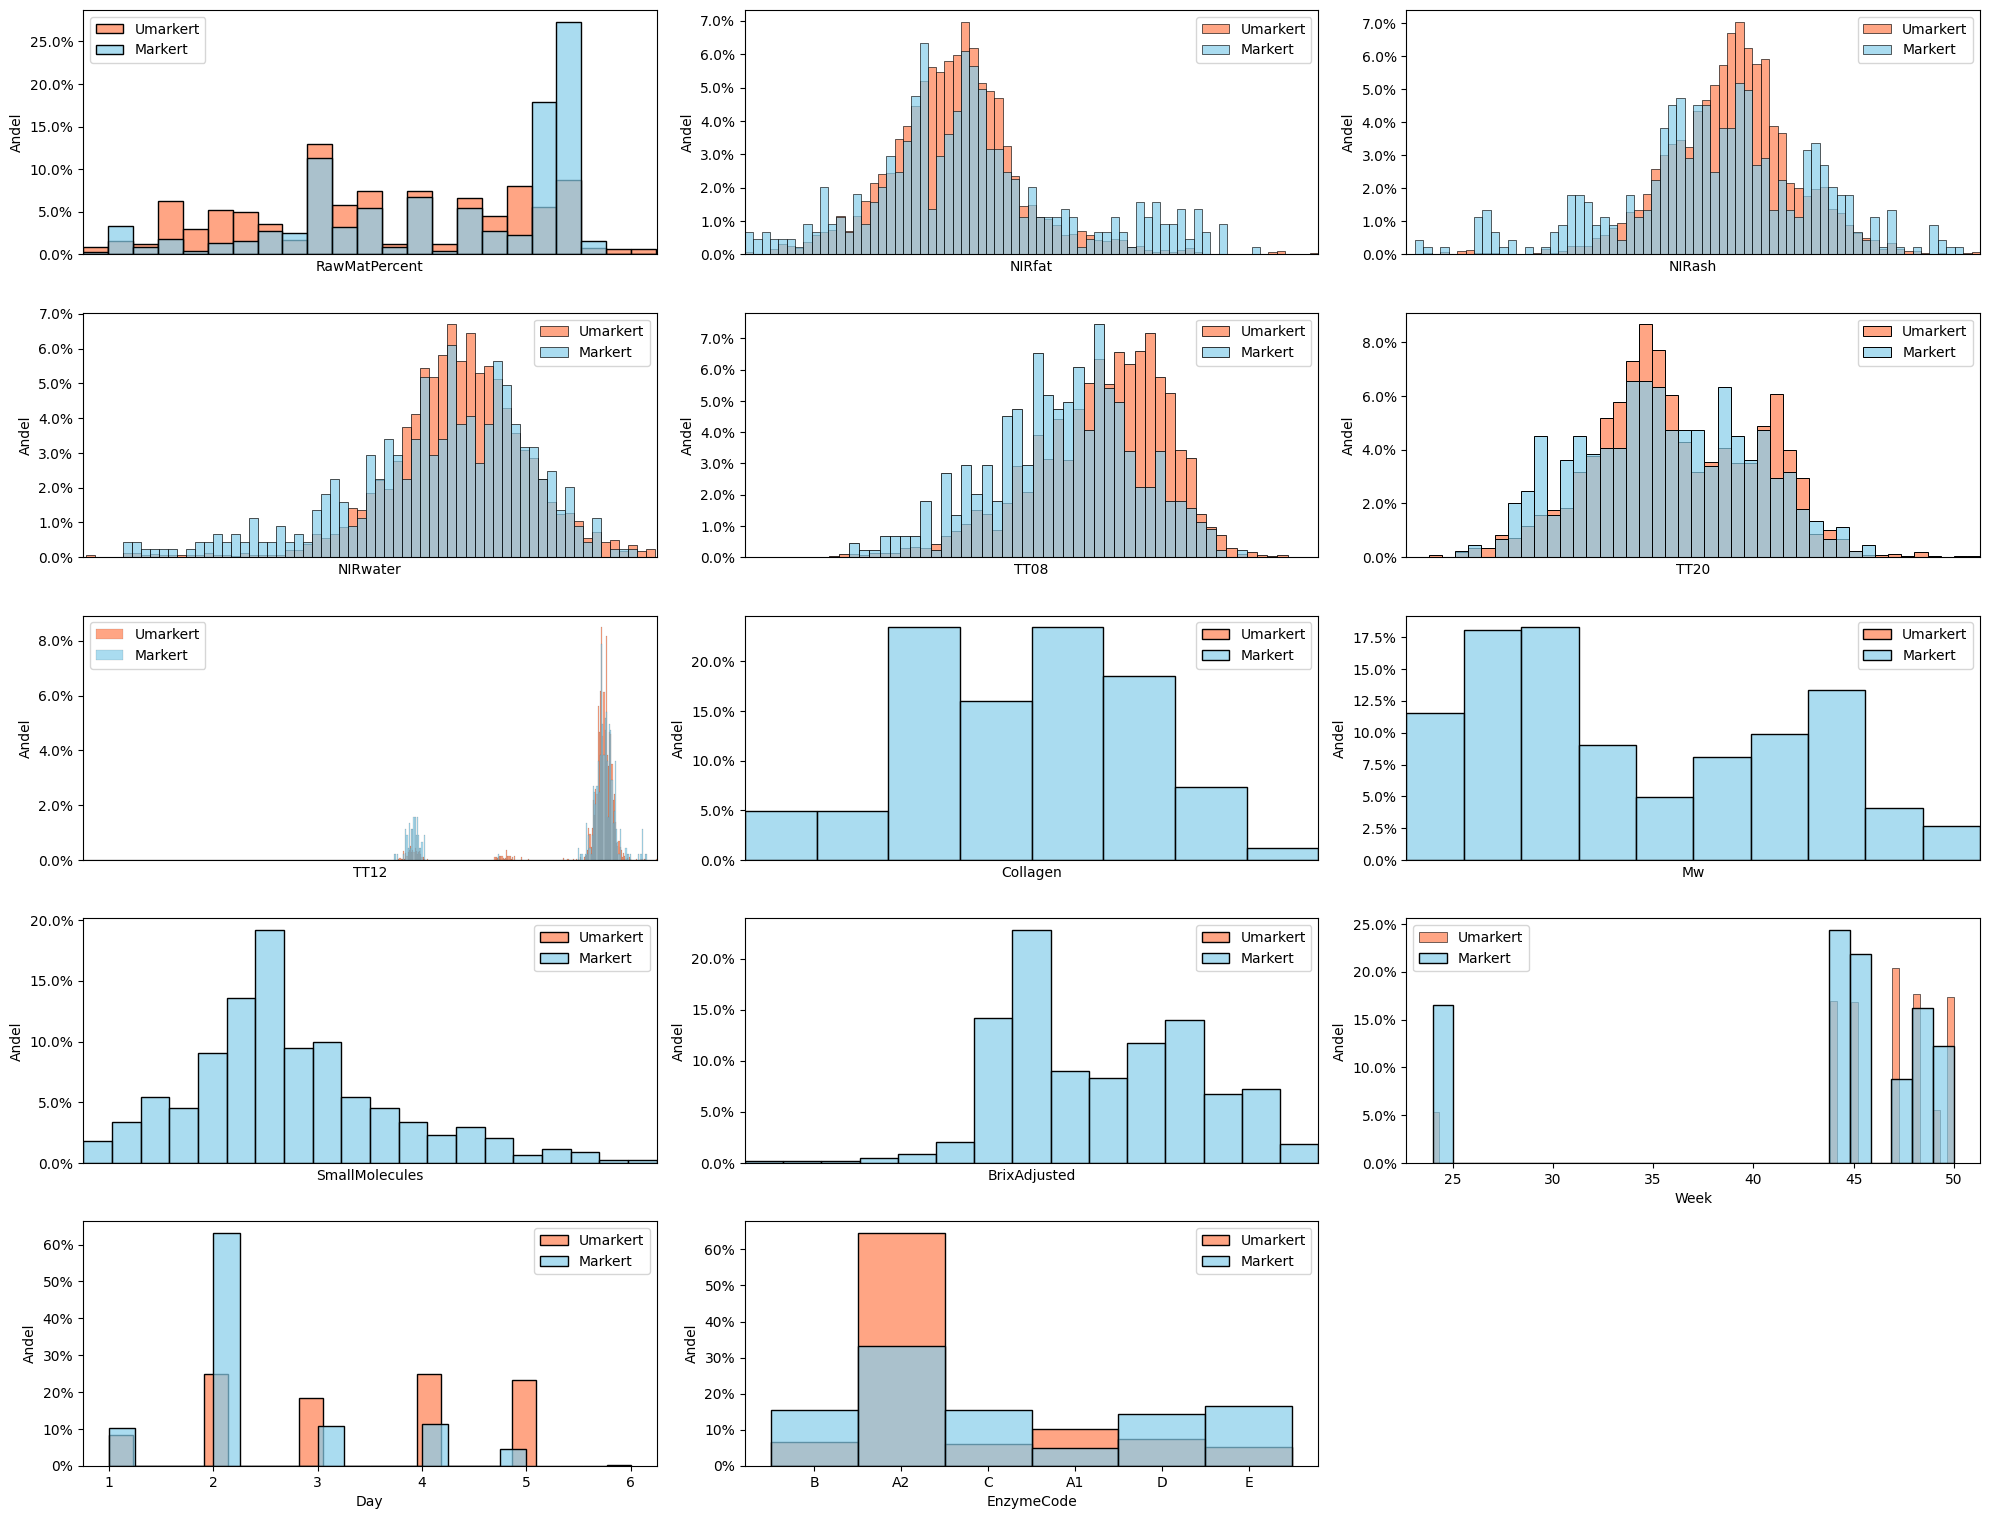

In [ ]:
plot_histogram(df1=kvalitetsmålinger_markert, df2=kvalitetsmålinger_umarkert, labels=['Markert', 'Umarkert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som respons

In [ ]:
kategoriske_fordelinger(kvalitetsmålinger_markert, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 147        | 33.1828     |
| E            | 73         | 16.4786     |
| B            | 69         | 15.5756     |
| C            | 69         | 15.5756     |
| D            | 63         | 14.2212     |
| A1           | 22         | 4.96614     |


Fordeling i umarkert del av datasettet

In [ ]:
kategoriske_fordelinger(kvalitetsmålinger_umarkert, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A2           | 3443       | 64.5966     |
| A1           | 548        | 10.2814     |
| D            | 388        | 7.27955     |
| B            | 355        | 6.66041     |
| C            | 314        | 5.89118     |
| E            | 282        | 5.29081     |


## Korrelasjon

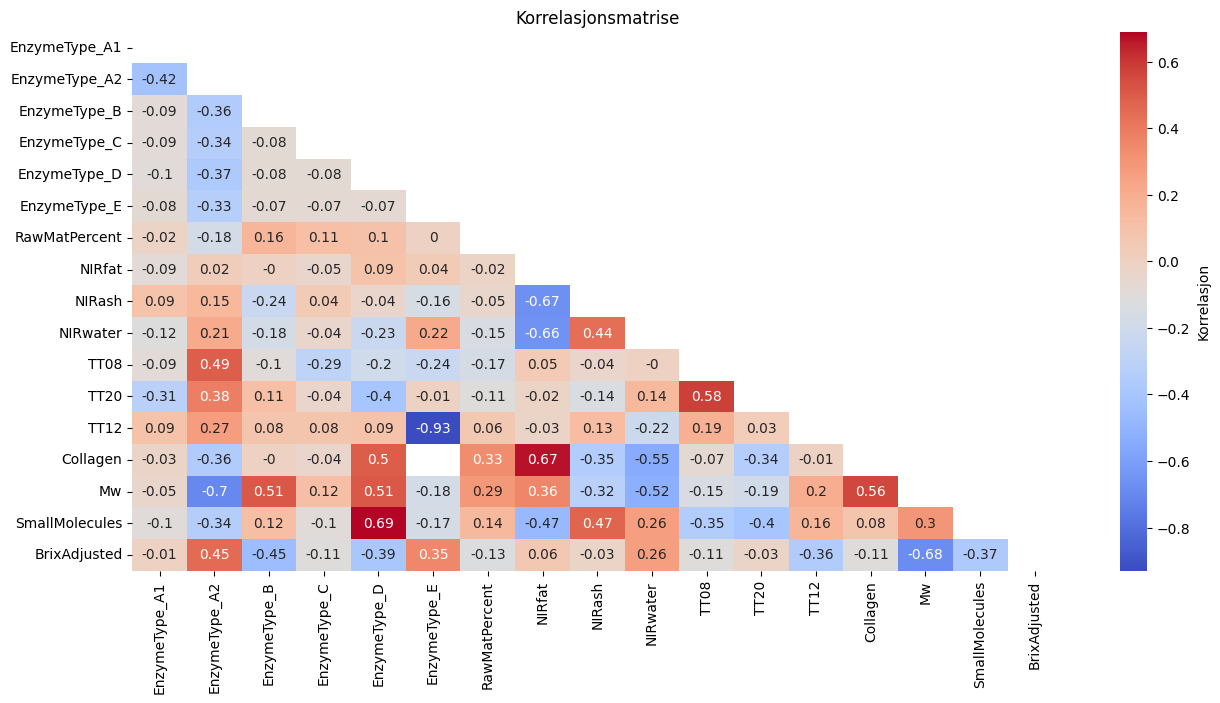

In [ ]:
# Lager en korrelasjonsmatrise med annotering
korrelasjon_matrise = behandlet_data.corr()

# Runder av til 2 desimaler for bedre lesbarhet
korrelasjon_matrise_avrundet = korrelasjon_matrise.round(2)

# Triangulær matrise
maske = np.triu(np.ones_like(korrelasjon_matrise_avrundet,
                             dtype=bool))

plt.figure(figsize=(15, 7))
sns.heatmap(korrelasjon_matrise_avrundet,
            annot=True,
            mask=maske,
            cmap='coolwarm',
            cbar_kws={'label': 'Korrelasjon'})
plt.title("Korrelasjonsmatrise")
plt.show()

# Dataforståelse av behandlet datasett: Design produksjon

Oppdeling av data for hver kvalitetsmåling under normal produksjon

In [ ]:
behandlet_design_prod, behandlet_normal_prod = splitt_design_normal_prod(rå_data, behandlet_data_tid)

In [ ]:
behandlet_design_prod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10890 entries, 2022-10-31 17:37:00 to 2023-06-14 01:01:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   10890 non-null  float64
 1   NIRfat          10890 non-null  float64
 2   NIRash          10890 non-null  float64
 3   NIRwater        10890 non-null  float64
 4   TT08            10890 non-null  float64
 5   TT20            10890 non-null  float64
 6   TT12            10890 non-null  float64
 7   Collagen        55 non-null     float64
 8   Mw              298 non-null    float64
 9   SmallMolecules  298 non-null    float64
 10  BrixAdjusted    298 non-null    float64
 11  Week            10890 non-null  UInt32 
 12  Day             10890 non-null  UInt32 
dtypes: UInt32(2), float64(11)
memory usage: 1.1 MB


In [ ]:
# Legger til uke og dagsinformasjon
behandlet_design_tid = copy.deepcopy(behandlet_design_prod)

# Enzymtyper
enzym_data = rå_data.merge(behandlet_design_prod,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

# Legger til enzymtypeinformasjon og ekskluderer "labelancodet"-kolonner for
# enzymer
behandlet_design_tid = pd.concat([behandlet_design_tid, enzym_data], axis=1)

Fordeling i variablene datasett med normal produksjon

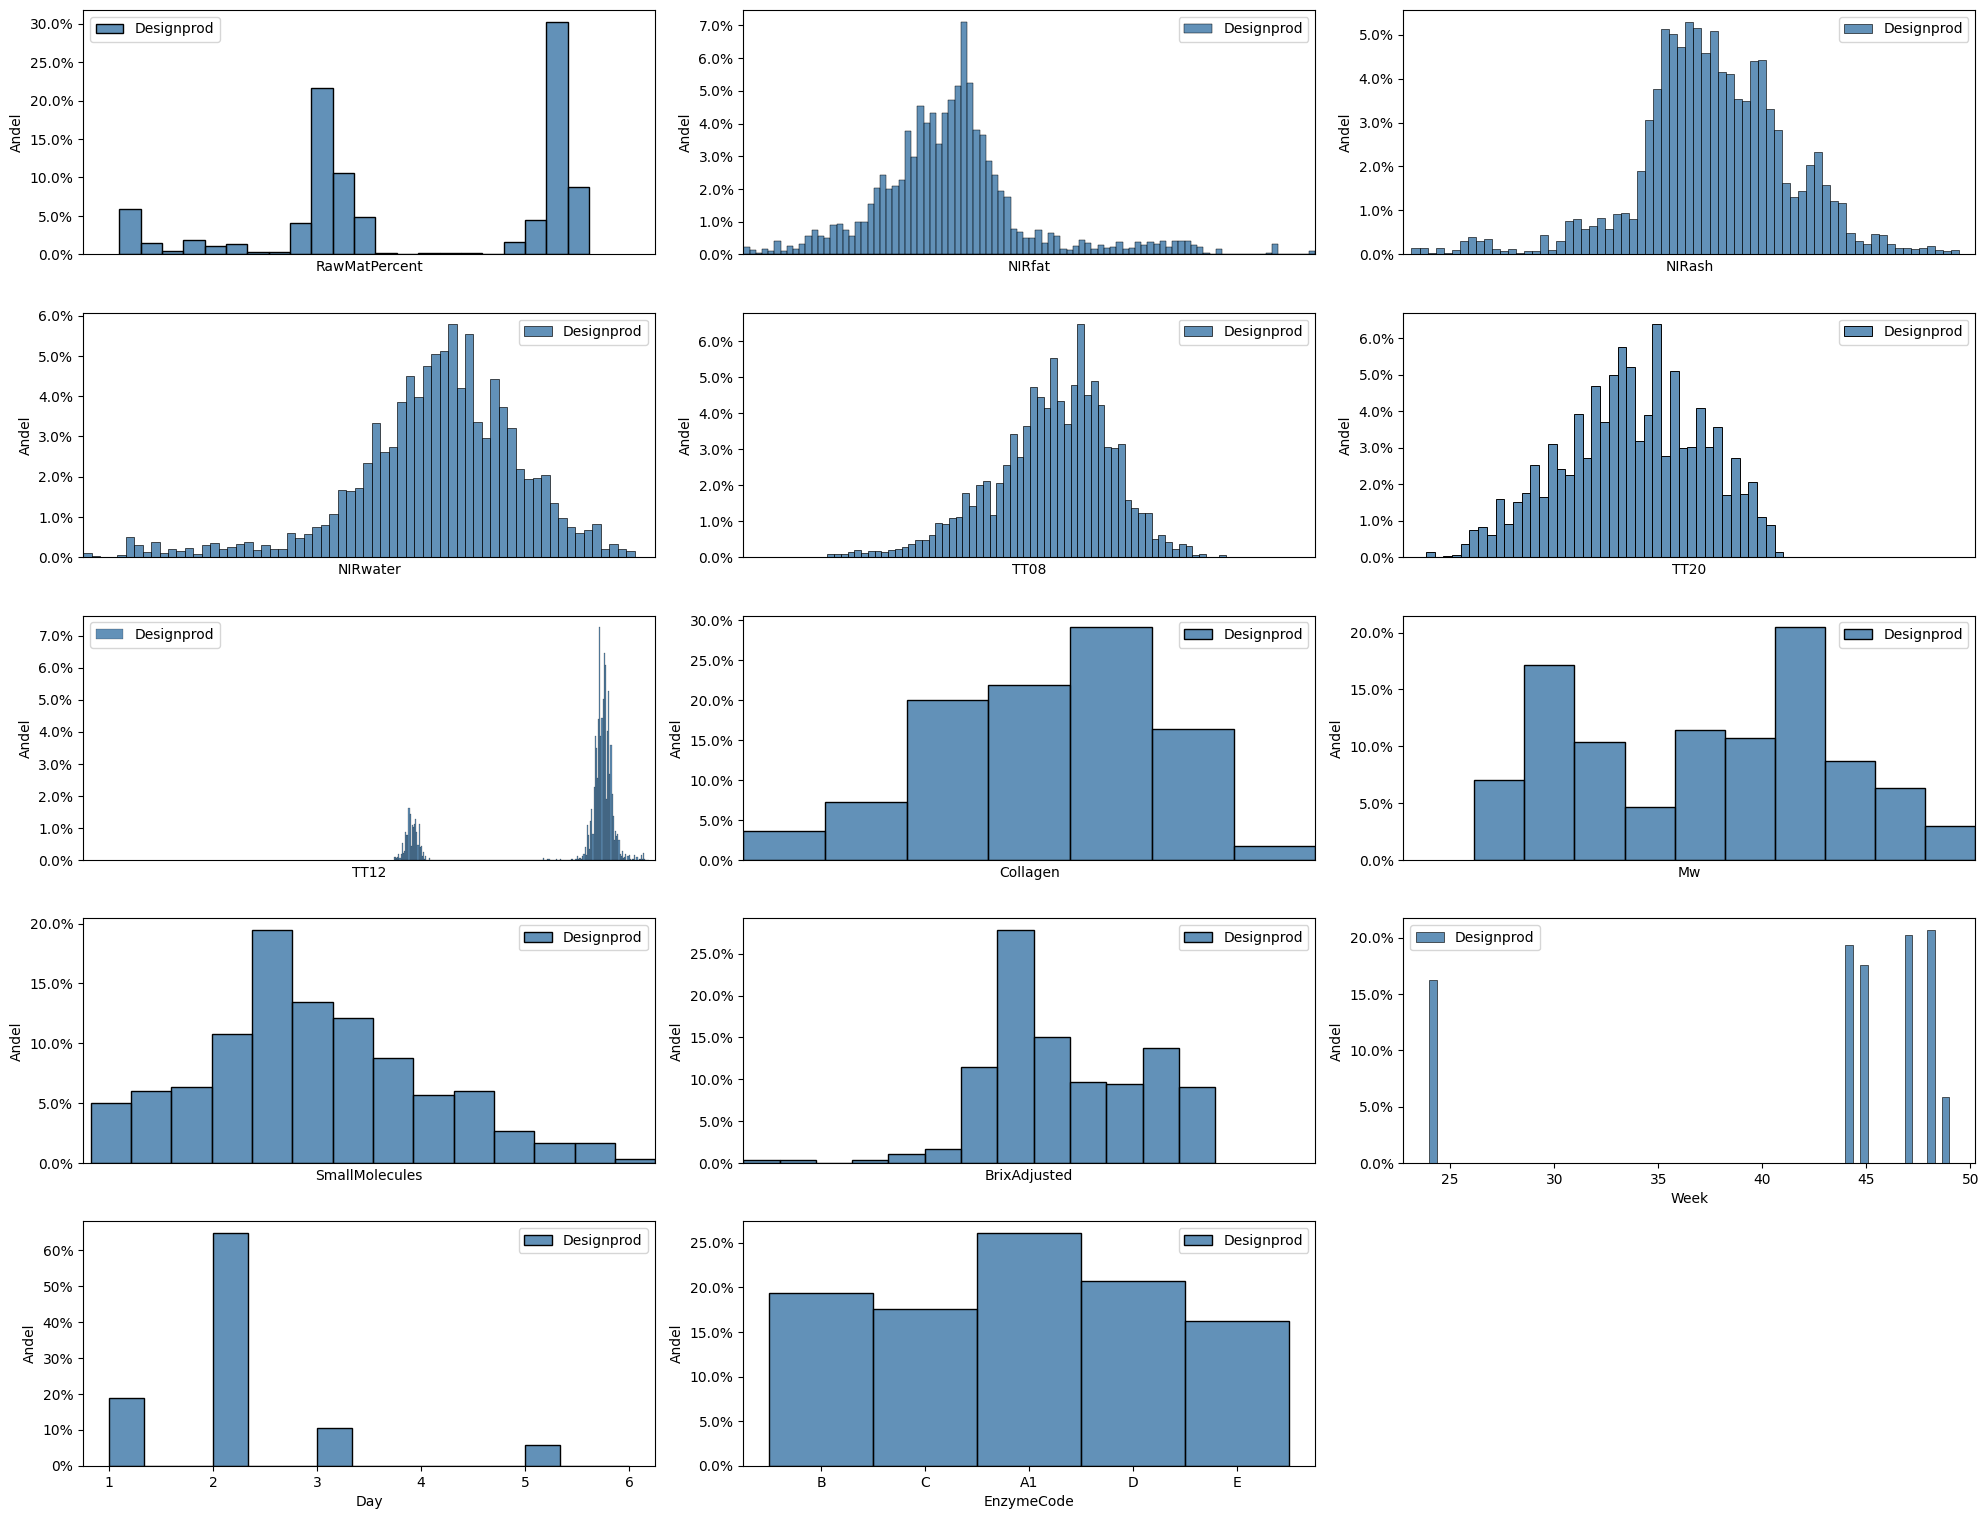

In [ ]:
plot_histogram(df1=behandlet_design_tid, df2=None, labels=['Designprod'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i normal produksjon datasett

In [ ]:
kategoriske_fordelinger(behandlet_design_tid, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A1           | 2845       | 26.1249     |
| D            | 2254       | 20.6979     |
| B            | 2112       | 19.3939     |
| C            | 1913       | 17.5666     |
| E            | 1766       | 16.2167     |


Fordeling i markert del av datasettet

In [ ]:
kvalitetsmålinger_markert_design, kvalitetsmålinger_umarkert_design = splitt_markert_umarkert(behandlet_design_tid)

Fordeling i datasett med Collagen som markert respons

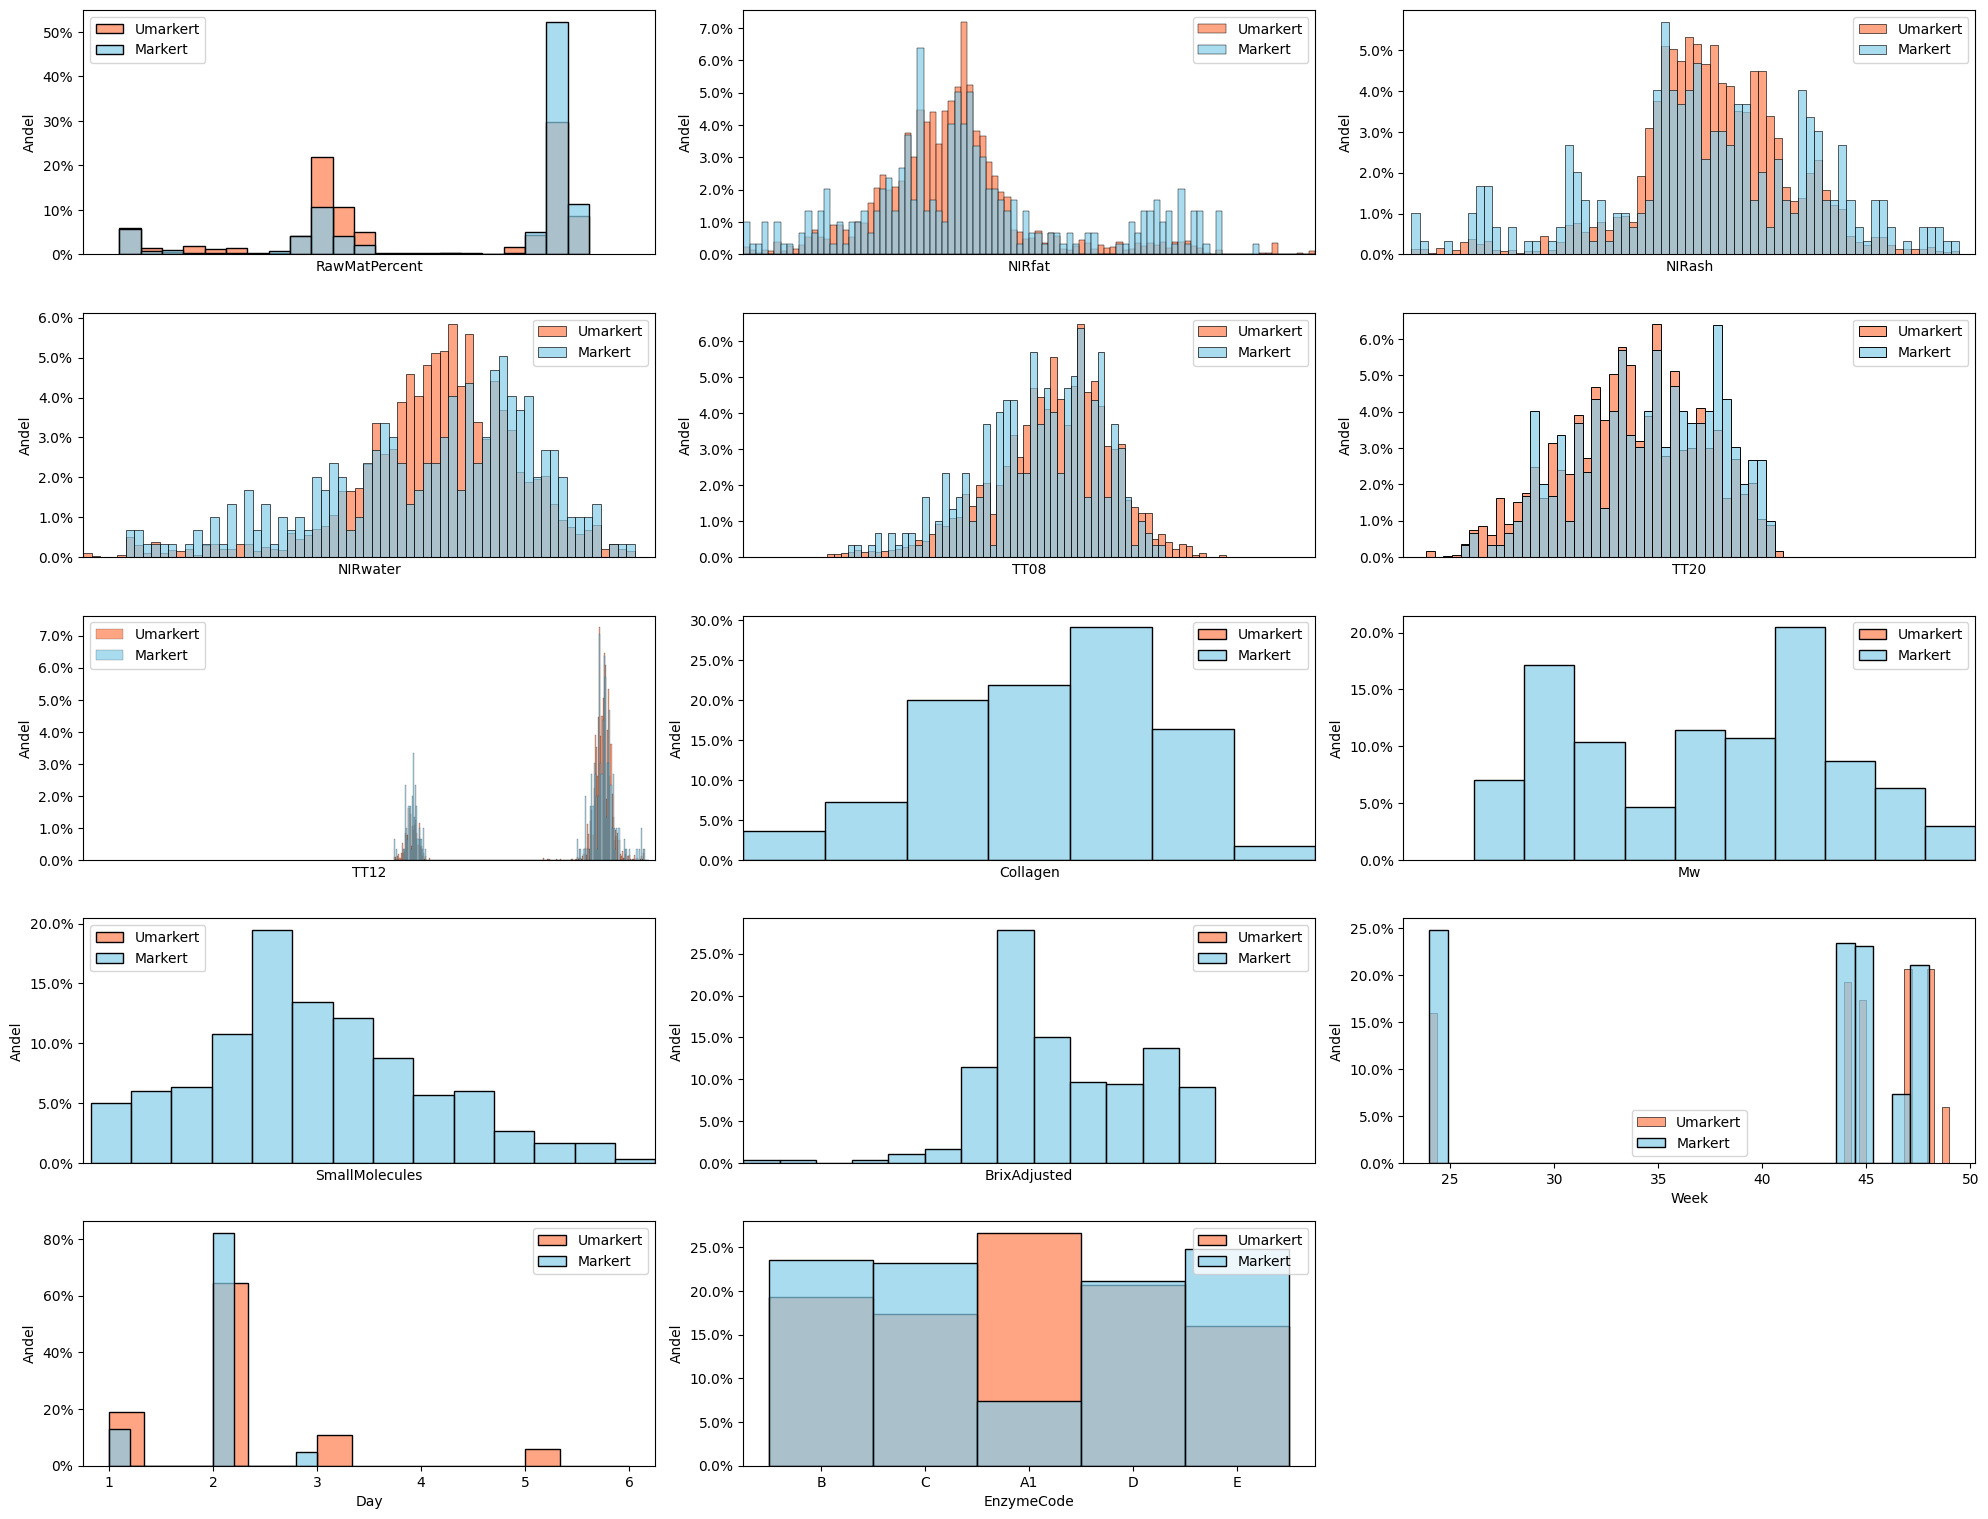

In [ ]:
plot_histogram(df1=kvalitetsmålinger_markert_design, df2=kvalitetsmålinger_umarkert_design, labels=['Markert', 'Umarkert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i datasett med Collagen som respons

In [ ]:
kategoriske_fordelinger(behandlet_design_tid, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| A1           | 2845       | 26.1249     |
| D            | 2254       | 20.6979     |
| B            | 2112       | 19.3939     |
| C            | 1913       | 17.5666     |
| E            | 1766       | 16.2167     |


# Dataforståelse: Designsett

Oppdeling av data for hver kvalitetsmåling under normal produksjon

In [ ]:
behandlet_design_sett = design_sett(rå_data, behandlet_data_tid)

In [ ]:
behandlet_design_sett.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8045 entries, 2022-10-31 17:37:00 to 2023-06-14 01:01:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   8045 non-null   float64
 1   NIRfat          8045 non-null   float64
 2   NIRash          8045 non-null   float64
 3   NIRwater        8045 non-null   float64
 4   TT08            8045 non-null   float64
 5   TT20            8045 non-null   float64
 6   TT12            8045 non-null   float64
 7   Collagen        53 non-null     float64
 8   Mw              276 non-null    float64
 9   SmallMolecules  276 non-null    float64
 10  BrixAdjusted    276 non-null    float64
 11  Week            8045 non-null   UInt32 
 12  Day             8045 non-null   UInt32 
dtypes: UInt32(2), float64(11)
memory usage: 832.8 KB


In [ ]:
# Legger til uke og dagsinformasjon
behandlet_designsett_tid = copy.deepcopy(behandlet_design_sett)

# Enzymtyper
enzym_data = rå_data.merge(behandlet_designsett_tid,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

# Legger til enzymtypeinformasjon og ekskluderer "labelancodet"-kolonner for
# enzymer
behandlet_designsett_tid = pd.concat([behandlet_designsett_tid, enzym_data], axis=1)

Fordeling i variablene datasett med normal produksjon

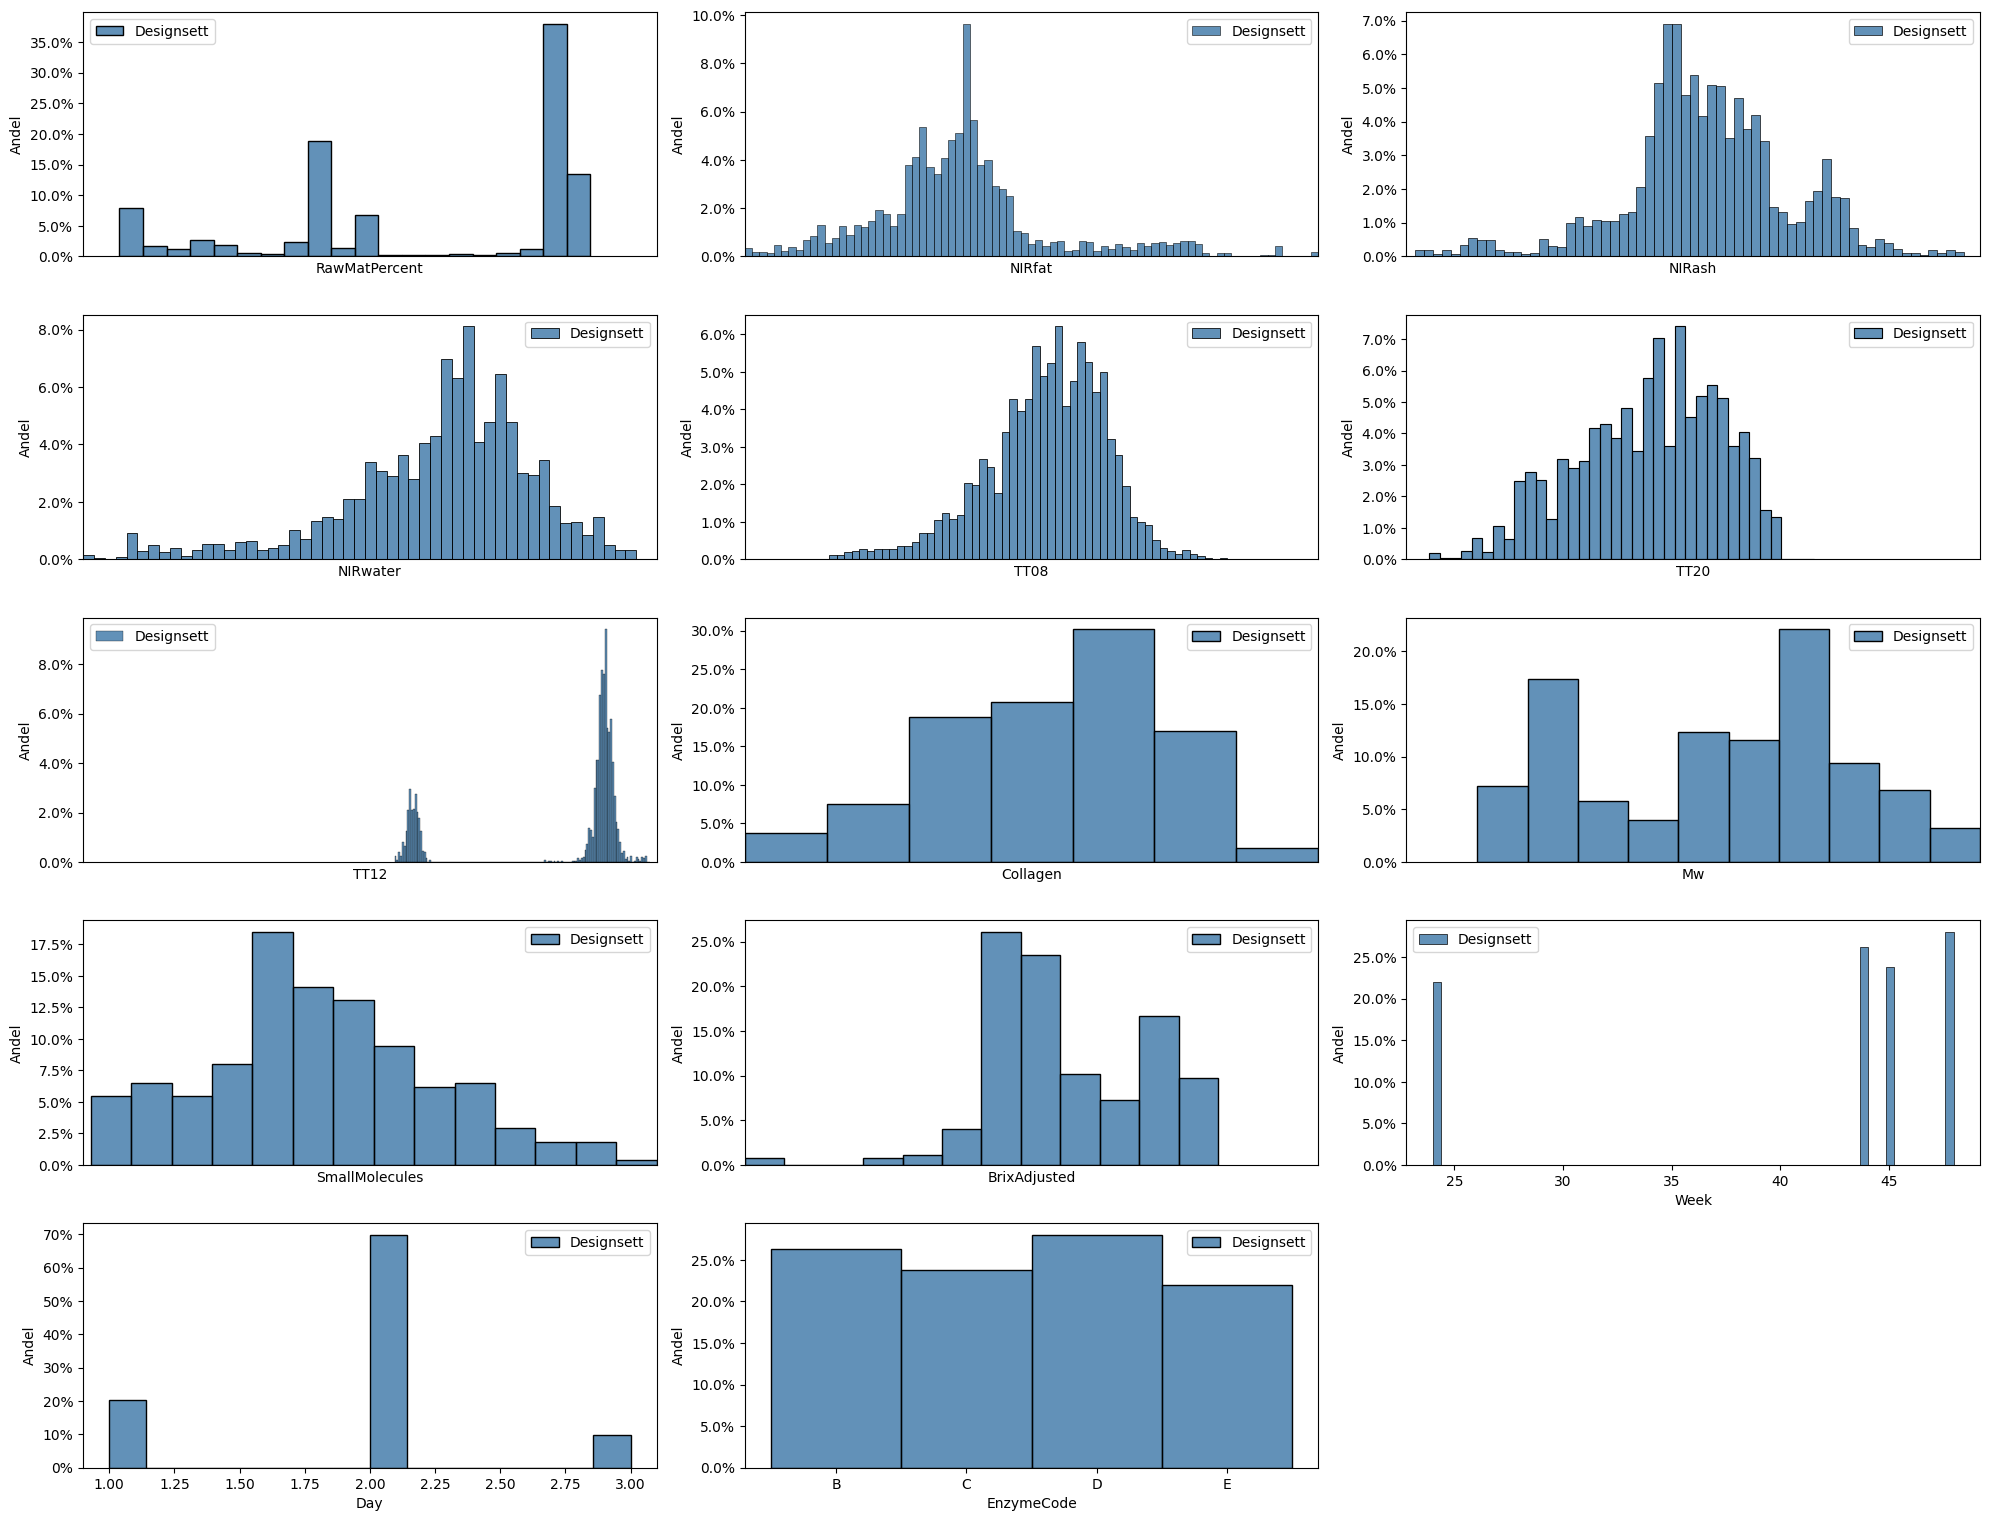

In [ ]:
plot_histogram(df1=behandlet_designsett_tid, df2=None, labels=['Designsett'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i normal produksjon datasett

In [ ]:
kategoriske_fordelinger(behandlet_designsett_tid, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| D            | 2254       | 28.0174     |
| B            | 2112       | 26.2523     |
| C            | 1913       | 23.7787     |
| E            | 1766       | 21.9515     |


Fordeling i markert del av datasettet

In [ ]:
kvalitetsmålinger_markert_designsett, kvalitetsmålinger_umarkert_designsett = splitt_markert_umarkert(behandlet_designsett_tid)

Fordeling i datasett med Collagen som markert respons

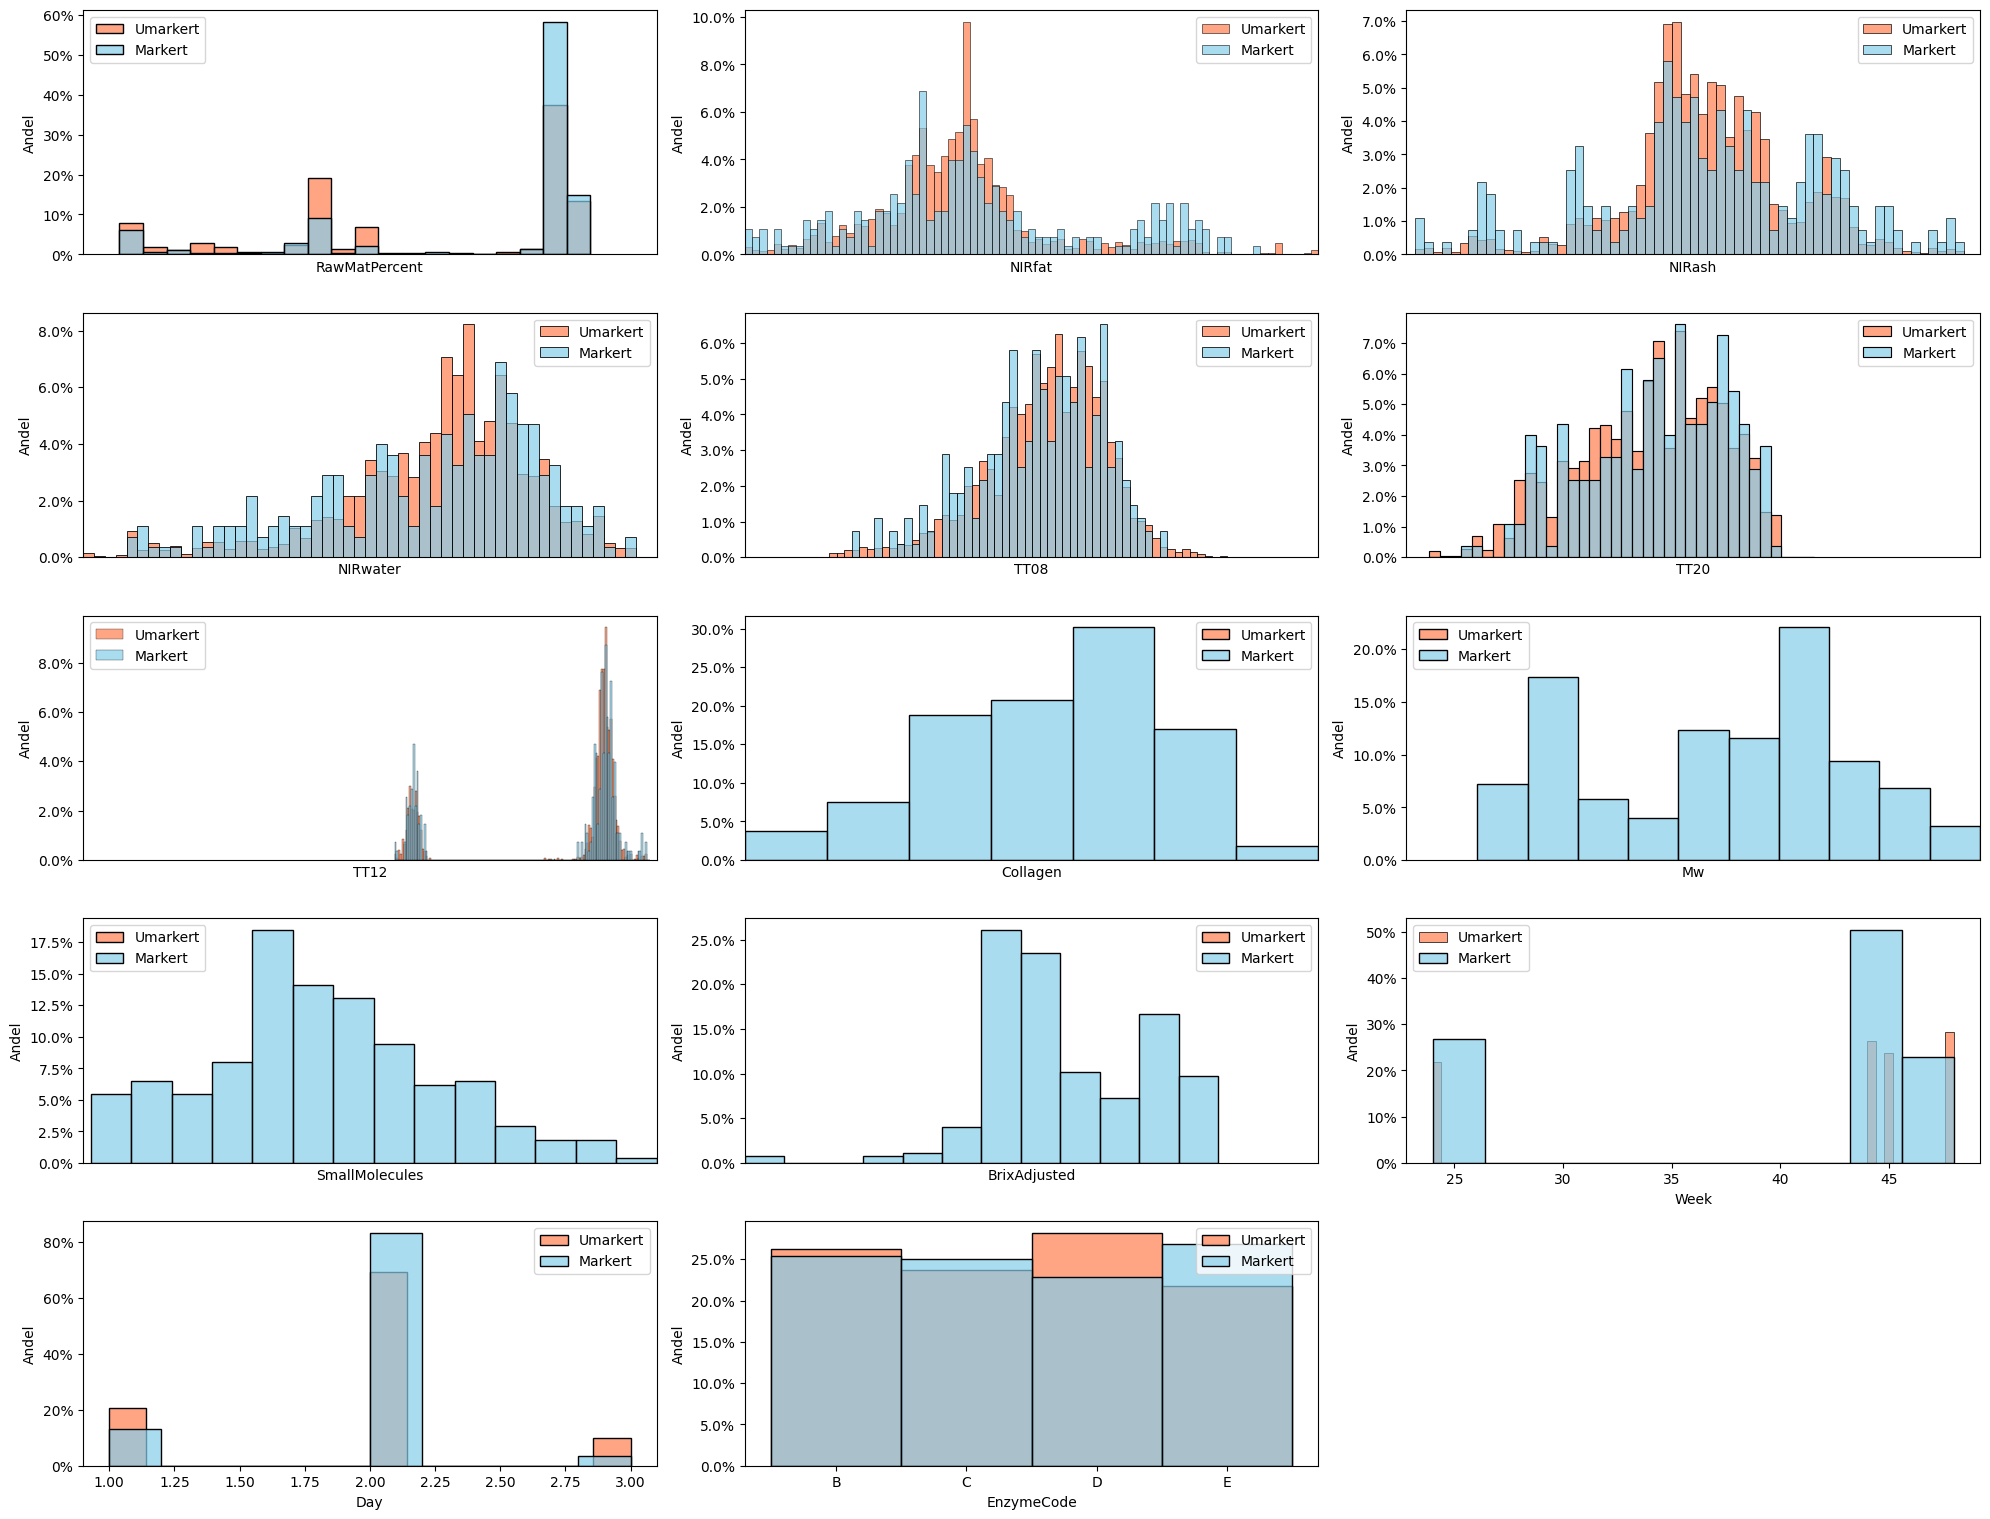

In [ ]:
plot_histogram(df1=kvalitetsmålinger_markert_designsett, df2=kvalitetsmålinger_umarkert_designsett, labels=['Markert', 'Umarkert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i datasett med Collagen som respons

In [ ]:
kategoriske_fordelinger(behandlet_designsett_tid, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| D            | 2254       | 28.0174     |
| B            | 2112       | 26.2523     |
| C            | 1913       | 23.7787     |
| E            | 1766       | 21.9515     |


# Dataforståelse: Designsett

Oppdeling av data for hver kvalitetsmåling under normal produksjon

In [ ]:
behandlet_design_sett = design_sett(rå_data, data_nedskalert_tid)

In [ ]:
behandlet_design_sett.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1613 entries, 2022-10-31 17:41:00 to 2023-06-14 01:01:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   1613 non-null   float64
 1   NIRfat          1613 non-null   float64
 2   NIRash          1613 non-null   float64
 3   NIRwater        1613 non-null   float64
 4   TT08            1613 non-null   float64
 5   TT20            1613 non-null   float64
 6   TT12            1613 non-null   float64
 7   Collagen        53 non-null     float64
 8   Mw              274 non-null    float64
 9   SmallMolecules  274 non-null    float64
 10  BrixAdjusted    274 non-null    float64
 11  Week            1613 non-null   UInt32 
 12  Day             1613 non-null   UInt32 
dtypes: UInt32(2), float64(11)
memory usage: 167.0 KB


In [ ]:
# Legger til uke og dagsinformasjon
behandlet_designsett_tid = copy.deepcopy(behandlet_design_sett)

# Enzymtyper
enzym_data = rå_data.merge(behandlet_designsett_tid,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

# Legger til enzymtypeinformasjon og ekskluderer "labelancodet"-kolonner for
# enzymer
behandlet_designsett_tid = pd.concat([behandlet_designsett_tid, enzym_data], axis=1)

Fordeling i variablene datasett med normal produksjon

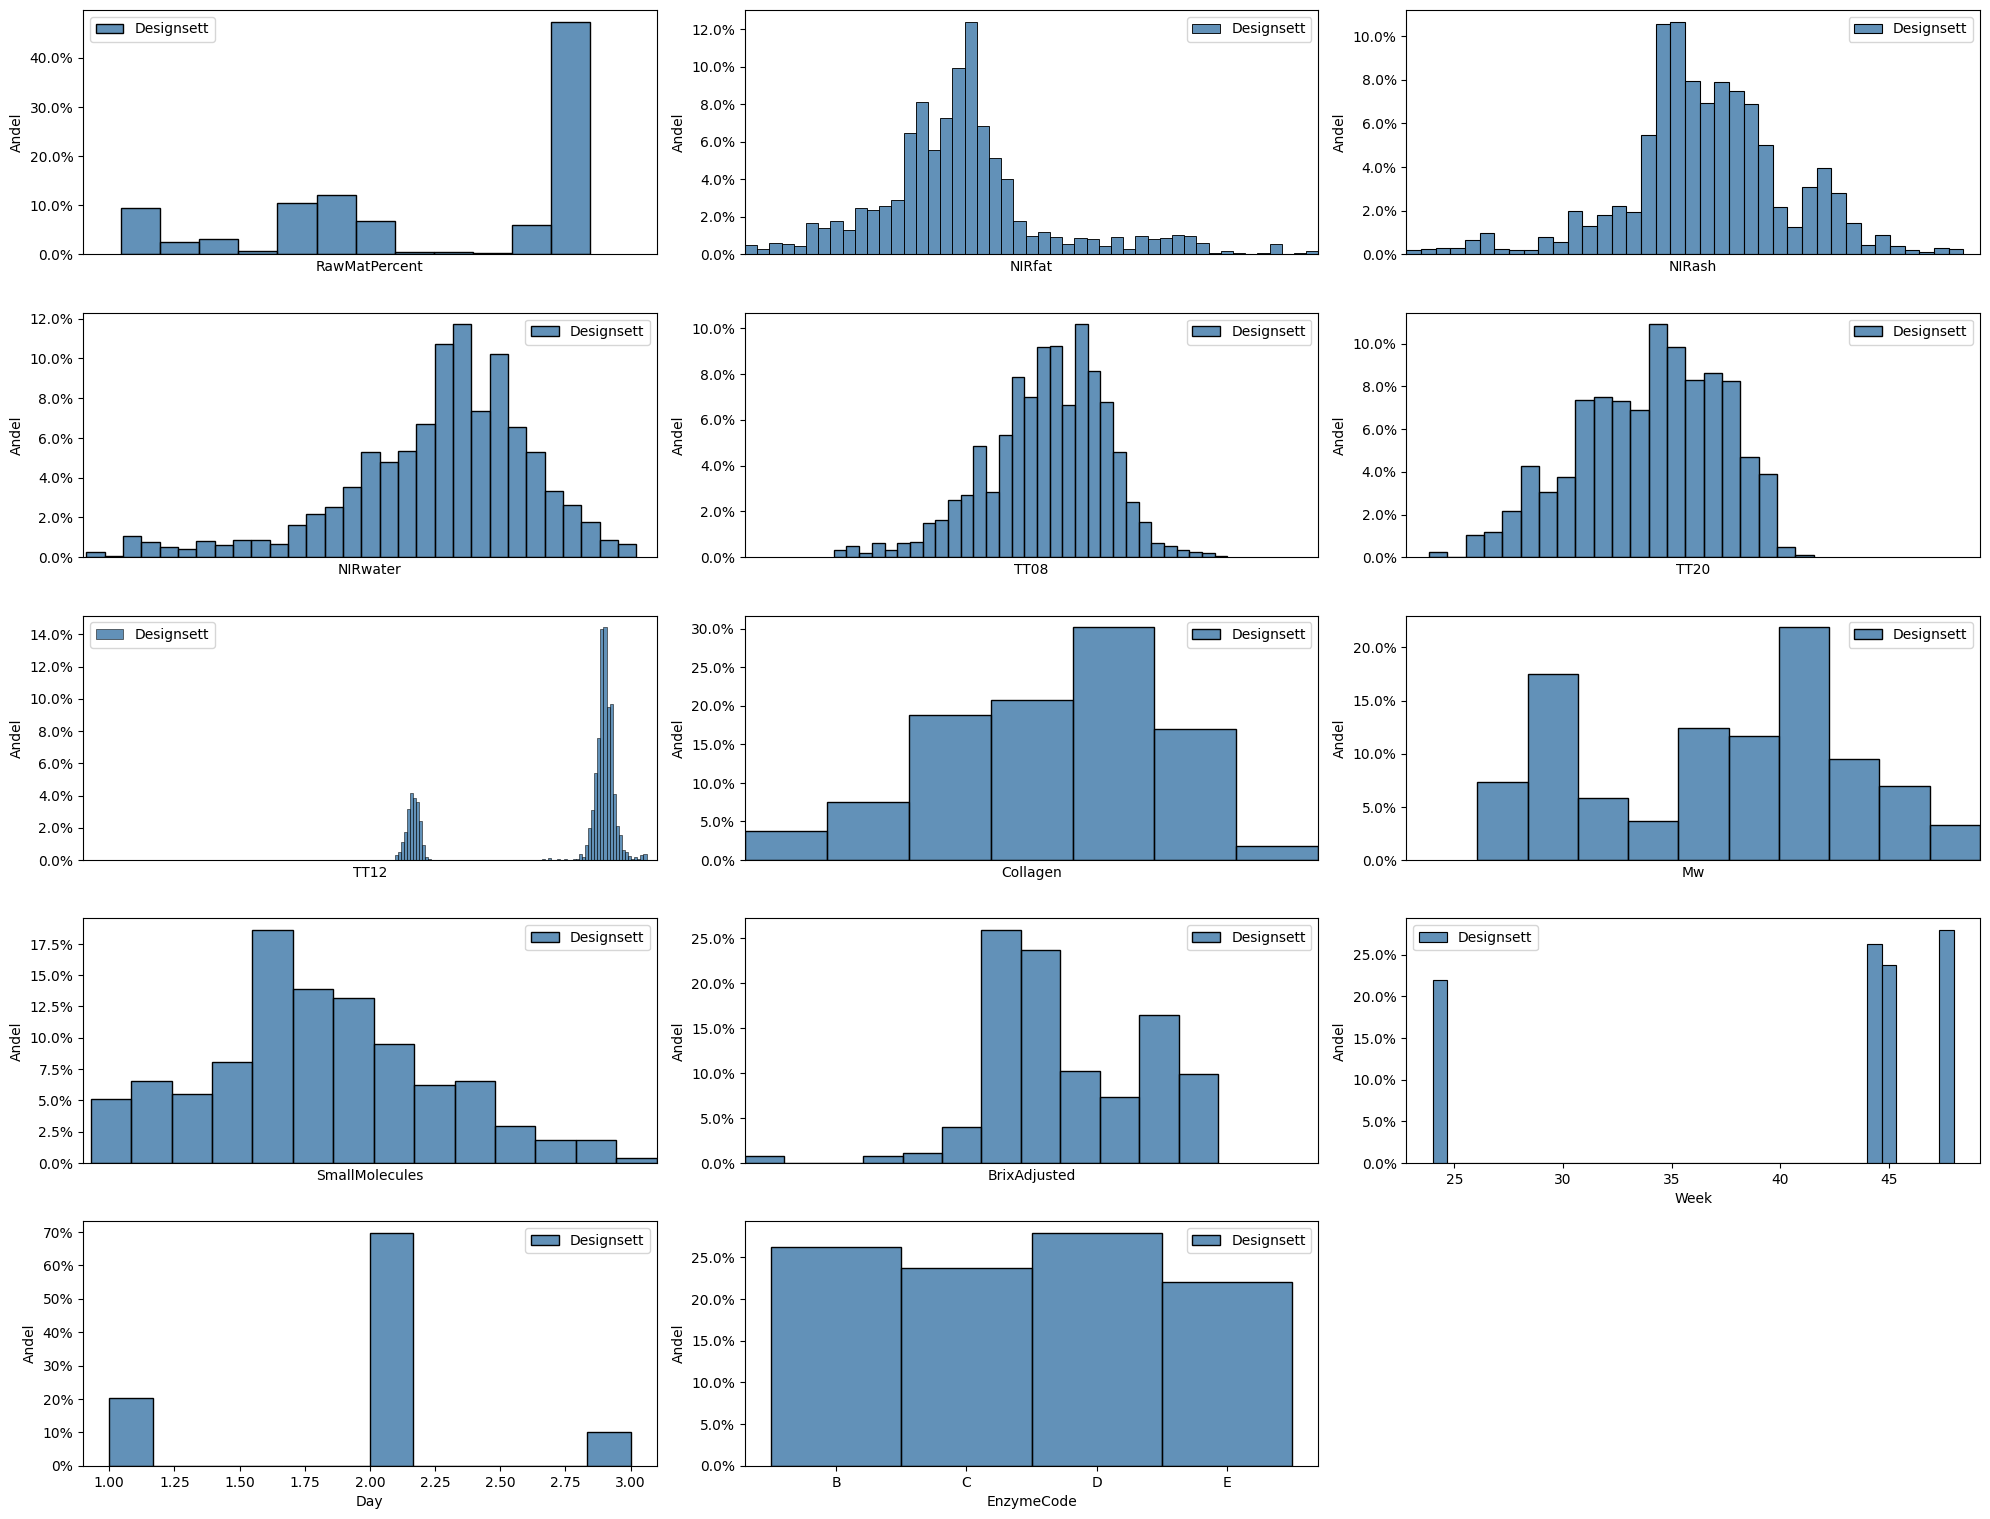

In [ ]:
plot_histogram(df1=behandlet_designsett_tid, df2=None, labels=['Designsett'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i normal produksjon datasett

In [ ]:
kategoriske_fordelinger(behandlet_designsett_tid, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| D            | 451        | 27.9603     |
| B            | 424        | 26.2864     |
| C            | 383        | 23.7446     |
| E            | 355        | 22.0087     |


Fordeling i markert del av datasettet

In [ ]:
kvalitetsmålinger_markert_designsett, kvalitetsmålinger_umarkert_designsett = splitt_markert_umarkert(behandlet_designsett_tid)

Fordeling i datasett med Collagen som markert respons

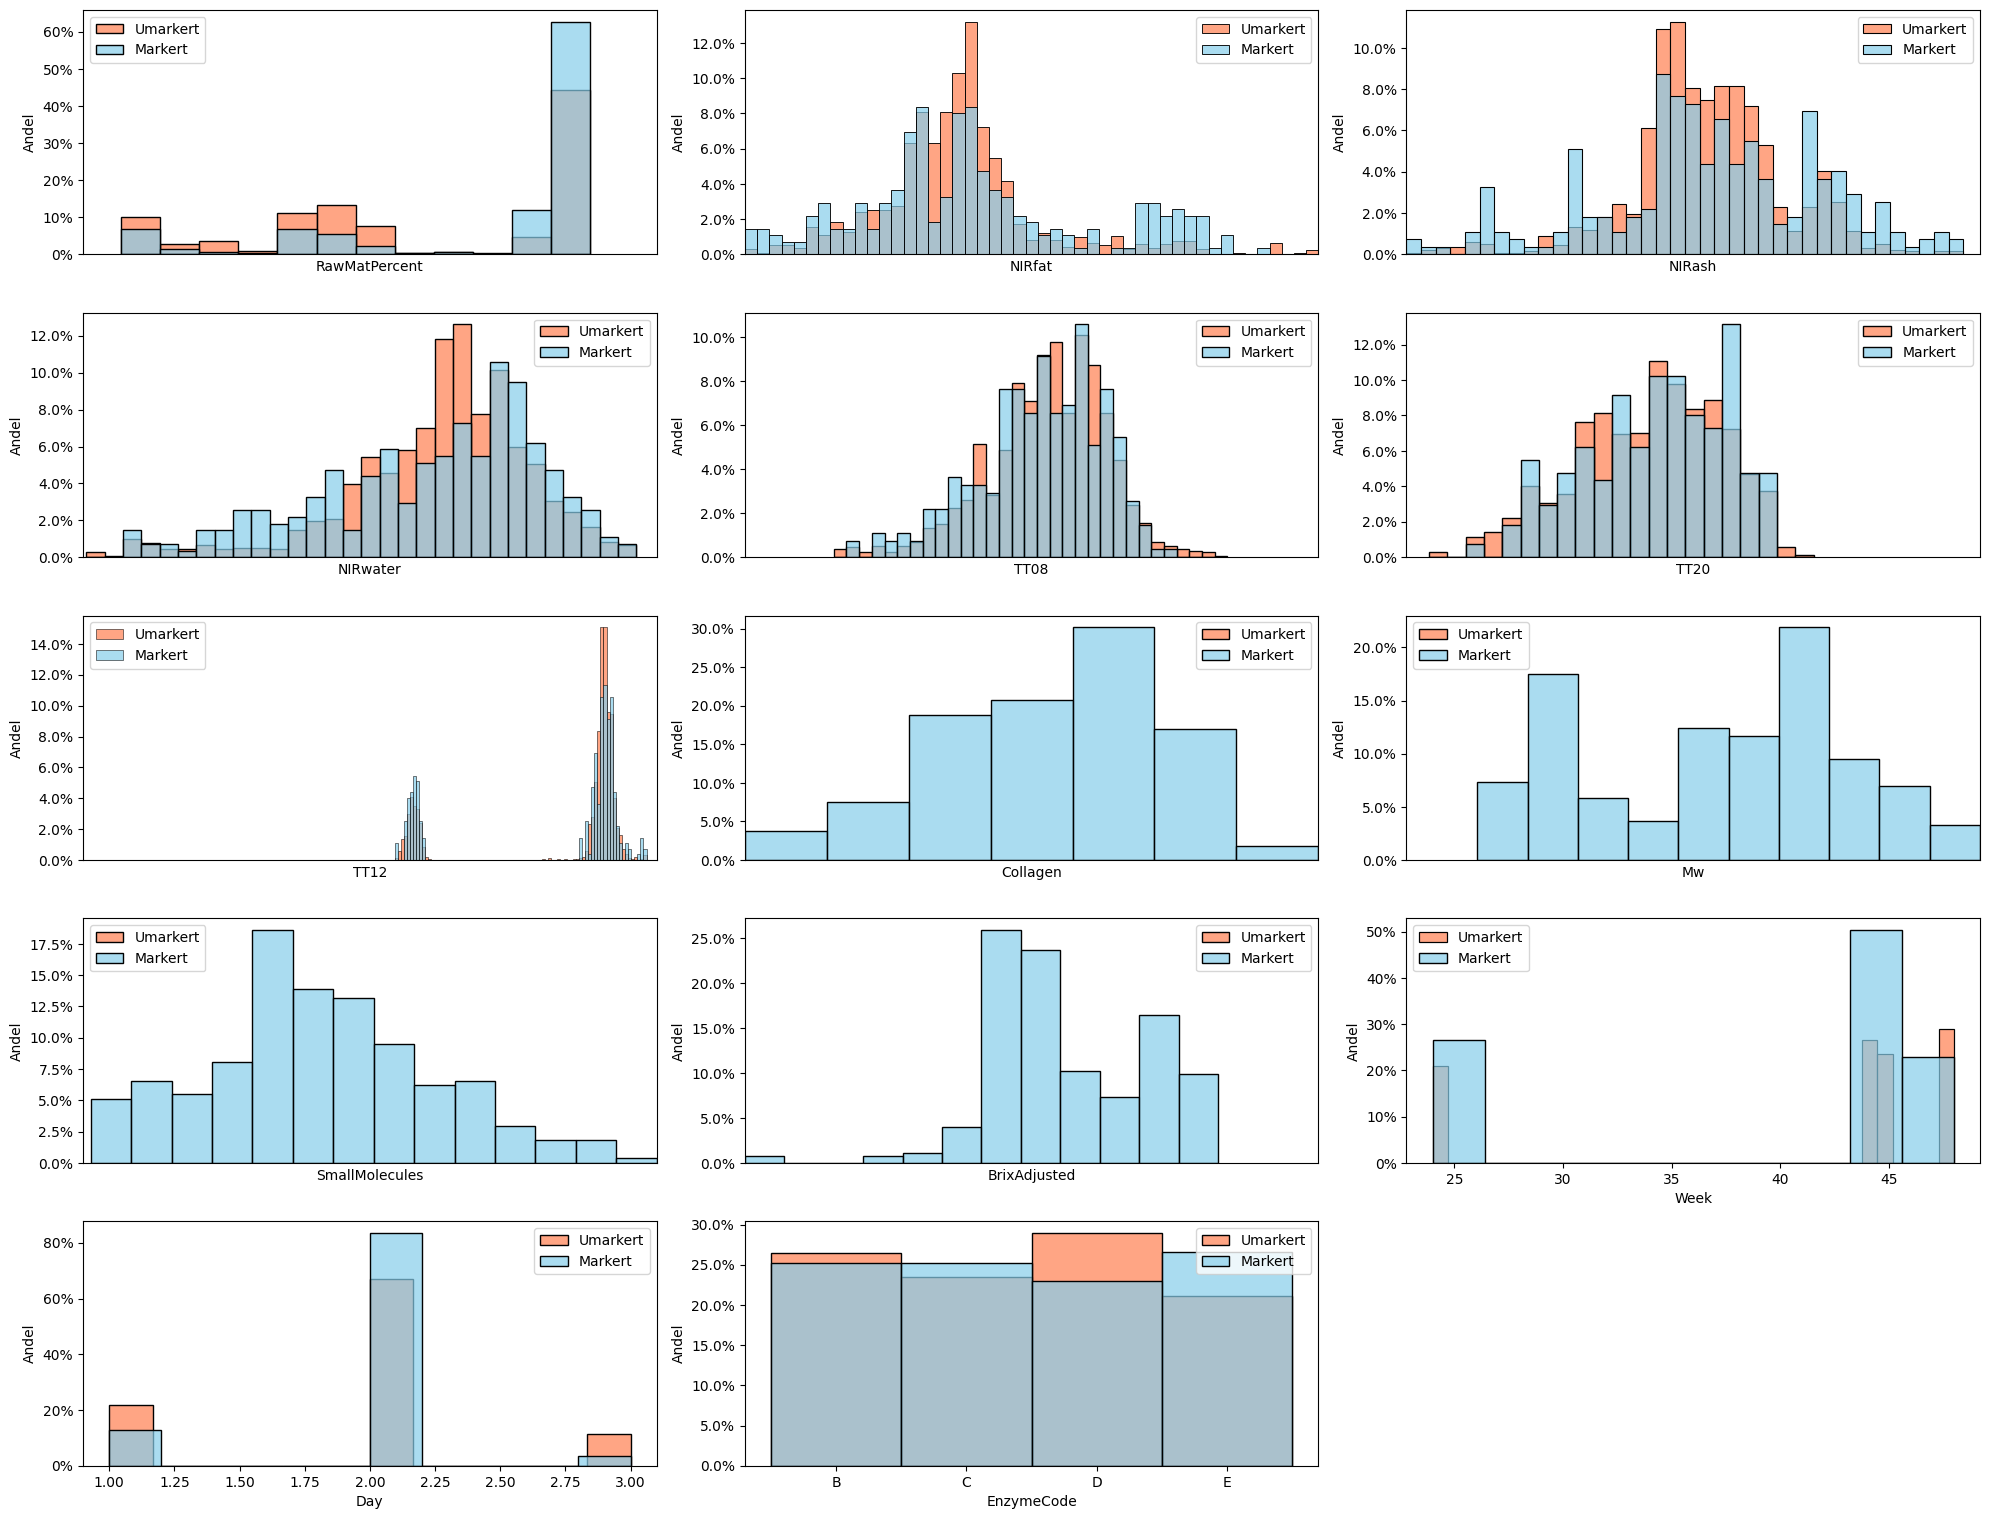

In [ ]:
plot_histogram(df1=kvalitetsmålinger_markert_designsett, df2=kvalitetsmålinger_umarkert_designsett, labels=['Markert', 'Umarkert'], min_max_dict=min_max_dict_hel, figsize=(20, 30))

Fordeling av Enzymtyper i datasett med Collagen som respons

In [ ]:
kategoriske_fordelinger(behandlet_designsett_tid, ["EnzymeCode"])


**Fordelingen i 'EnzymeCode':**
| EnzymeCode   | Frekvens   | Andel (%)   |
|:-------------|:-----------|:------------|
| D            | 451        | 27.9603     |
| B            | 424        | 26.2864     |
| C            | 383        | 23.7446     |
| E            | 355        | 22.0087     |


# Oppdeling av datasett

Oppdeling av data for hver kvalitetsmåling

In [ ]:
# Lager en kopi av datasett med en kvalitesmåling som respons hver
collagen_data = behandlet_data.drop(columns=['Mw',
                                             'SmallMolecules',
                                             'BrixAdjusted'])

mw_data = behandlet_data.drop(columns=['Collagen',
                                       'SmallMolecules',
                                       'BrixAdjusted'])

smallmolecules_data = behandlet_data.drop(columns=['Collagen',
                                                   'Mw',
                                                   'BrixAdjusted'])

brixadjusted_data = behandlet_data.drop(columns=['Collagen',
                                                 'Mw',
                                                 'SmallMolecules'])

In [ ]:
collagen_data.shape

(28701, 14)

In [ ]:
collagen_data_design.shape

NameError: name 'collagen_data_design' is not defined

Oppdeling av data for hver kvalitetsmåling (design produksjon)

In [ ]:
# Lager en kopi av datasett med en kvalitesmåling under normalproduksjon
# som respons hver
collagen_data_design = design_sett(rå_data, collagen_data)

mw_data_design = design_sett(rå_data, mw_data)

smallmolecules_data_design = design_sett(rå_data, smallmolecules_data)

brixadjusted_data_design = design_sett(rå_data, brixadjusted_data)

# Lagring av alle datasett som csv filer

In [ ]:
collagen_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data.csv')
mw_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data.csv')
smallmolecules_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmolecules_data.csv')
brixadjusted_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data.csv')

collagen_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data_design.csv')
mw_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data_design.csv')
smallmolecules_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmolecules_data_design.csv')
brixadjusted_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data_design.csv')